In [1]:
import pandas as pd

In [2]:
pd.set_option("max_columns",100)
pd.set_option("max_colwidth",1000)

In [3]:
tweets = pd.read_pickle("../../data/cp_tweets_classified.pkl")

In [4]:
tweets.head()

,tweet_id,created_at,entities_hashtags,entities_mentions,place_bounding_box,country,place_country_code,place_full_name,place_id,place_name,place_place_type,place_url,favorite_count,geo_coordinates,geo_type,text,lang,retweet_count,retweeted,source,timestamp_ms,user_id,user_created_at,user_favourites_count,user_followers_count,user_following,user_friends_count,user_location,user_screen_name,user_statuses_count,user_time_zone,user_url,user_verified,about
0,764039724818272256,Fri Aug 12 10:04:00 +0000 2016,[],"[(10774652, 10774652, [0, 9], TheBlaze, theblaze), (25073877, 25073877, [10, 26], Donald J. Trump, realDonaldTrump)]","([[[-90.433909, 38.606163], [-90.433909, 38.647891], [-90.405462, 38.647891], [-90.405462, 38.606163]]], Polygon)",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,city,https://api.twitter.com/1.1/geo/id/29a119f18820c3ad.json,0,None,None,@theblaze @realDonaldTrump https://t.co/TY9DlZ584c,und,0,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1470996240225,366636488,Fri Sep 02 14:54:17 +0000 2011,1708,186,None,446,Miami,DUPUY77,17620,None,http://ggm-dupuy.com,False,0.0
1,764039733076897792,Fri Aug 12 10:04:02 +0000 2016,"[([62, 72], NOJUSTICE), ([93, 104], TrumpPence)]","[(813286, 813286, [0, 12], Barack Obama, BarackObama), (17629860, 17629860, [14, 18], FBI, FBI), (3290070855, 3290070855, [19, 32], AG Loretta Lynch, LorettaLynch), (25073877, 25073877, [75, 91], Donald J. Trump, realDonaldTrump)]","([[[-91.218994, 30.354161], [-91.218994, 30.564039], [-90.962605, 30.564039], [-90.962605, 30.354161]]], Polygon)",United States,US,"Baton Rouge, LA",c7ef5f3368b68777,Baton Rouge,city,https://api.twitter.com/1.1/geo/id/c7ef5f3368b68777.json,0,None,None,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3,en,0,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1470996242194,82496193,Thu Oct 15 00:28:04 +0000 2009,3850,531,None,677,"Ogletown, DE",redoctapus,5046,Eastern Time (US & Canada),None,False,0.0
2,764039769244348417,Fri Aug 12 10:04:10 +0000 2016,[],"[(10774652, 10774652, [0, 9], TheBlaze, theblaze), (25073877, 25073877, [10, 26], Donald J. Trump, realDonaldTrump)]","([[[-90.433909, 38.606163], [-90.433909, 38.647891], [-90.405462, 38.647891], [-90.405462, 38.606163]]], Polygon)",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,city,https://api.twitter.com/1.1/geo/id/29a119f18820c3ad.json,0,None,None,@theblaze @realDonaldTrump https://t.co/n050DBSpv0,und,0,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1470996250817,366636488,Fri Sep 02 14:54:17 +0000 2011,1708,186,None,446,Miami,DUPUY77,17621,None,http://ggm-dupuy.com,False,0.0
3,764039812479225856,Fri Aug 12 10:04:21 +0000 2016,[],"[(1339835893, 1339835893, [0, 15], Hillary Clinton, HillaryClinton)]","([[[144.593742, -38.433859], [144.593742, -37.511274], [145.512529, -37.511274], [145.512529, -38.433859]]], Polygon)",Australia,AU,"Melbourne, Victoria",01864a8a64df9dc4,Melbourne,city,https://api.twitter.com/1.1/geo/id/01864a8a64df9dc4.json,0,None,None,@HillaryClinton he will do in one year all the things you should have done in eight,en,0,False,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1470996261125,44032624,Tue Jun 02 01:59:59 +0000 2009,1514,180,None,298,Australia,jjorgi30,2231,Melbourne,None,False,1.0
4,764039849850482689,Fri Aug 12 10:04:30 +0000 2016,"[([0, 4], CNN), ([5, 12], newday), ([19, 25], Trump), ([79, 84], ISIS)]",[],"([[[-76.711521, 39.197211], [-76.711521, 39.372215], [-76.529443, 39.372215], [-76.529443, 39.197211]]], Polygon)",United States,US,"Baltimore, MD",c0b8e8dc81930292,Baltimore,city,https://api.twitter.com/1.1/geo/id/c0b8e8dc81930292.json,0,None,None,"#CNN #newday clear #Trump deliberately throwing this race,in 2007 he knew that #ISIS and 

In [5]:
gcount = tweets.groupby(by="user_screen_name").count()

In [6]:
import seaborn as sns

/home/jeroen/miniconda3/envs/FDS-PROJECT1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


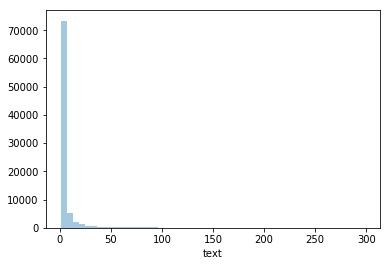

In [7]:
sns.distplot(gcount.text[gcount.text < 300],kde=False)
# the x-axis is twitter count. 

In [8]:
#gcount.text[gcount.text > 300]

In [9]:
t = gcount.text
users = t[gcount.text < 300].reset_index().user_screen_name

In [10]:
tweets.shape

(651063, 34)

In [11]:
tweets = tweets[tweets.user_screen_name.isin(users)]

In [12]:
tweets.shape

(540501, 34)

## have a lok at the data and apply preproccessing to it

In [13]:
import sys
lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [14]:
import preprocessor

In [15]:
tweets = tweets[(tweets.place_country_code == "US") & (tweets.lang == "en")]

In [16]:
tweets["clean_text"] = preprocessor.preprocess_tweets(tweets['text'],True,True)

In [17]:
tweets.head(10).text 

1     @BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3
5      @realDonaldTrump, you wouldn't recognize a lie if it came from your own mouth, and they do continually. #NeverTrump https://t.co/pKSQM8yikm
7     "Kid, you know, suing someone? Thats the most beautiful thing 1 human being could do to another human being" @funnyordie @realDonaldTrump😂💩s
8                                 @HillaryClinton you ARE the co-founder of ISIS, you crooked, evil, lying, witch. How can you live with yourself?
10    @mike4193496 @realDonaldTrump I TOTALLY CONCUR!! This Election is just CRA CRA n Corruption in our Gov is Mind Blowing!! Trump= Last Hope!!!
11    @realDonaldTrump @elsolarverde What issues? Your idiot claim that she "founded" ISIS? Trump will go to Hell for lying &amp; stealing. Shame!
12     Can't stand @HillaryClinton or @realDonaldTrump?Take a look. They can win...don't settle. #15for15 #TeamGov #Yo

In [18]:
# lower case text
tweets.head(10).clean_text 

1                                                                collusion together
5                                              recognize lie came mouth continually
7       kid know suing someone thats beautiful thinghuman could another human being
8                             cofounder isis crooked evil lying witch live yourself
10    totally concur election cra cra n corruption gov mind blowing trump last hope
11                issues idiot claim founded isis trump go hell lyingstealing shame
12                                                   cant stand look windont settle
13                        rape allegations getting attention cause seeming probable
15             gop pleading w trump just control behavior weeks wantyearsterrifying
16     isis cofounder hillary clinton obama also devil hillary sits left hand devil
Name: clean_text, dtype: object

## Stemming & Lammatization

In [19]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import * 

In [20]:
stemmer = SnowballStemmer("english")

In [21]:
text_stem_lam = tweets\
                        .clean_text\
                        .apply(lambda x: x.split(' '))\
                                        .apply(lambda l:
                                        list(map(
                                            lambda x: WordNetLemmatizer().lemmatize(x, pos='v'),
                                            l))
                                        )
#.sample(100000)\

In [22]:
# remove empty lists
l = text_stem_lam.str.len() != 1
text_stem_lam = text_stem_lam[l]

In [23]:
# remove items in list that are empty
def sort_list(l):
    l.sort()
    found_non_space = False
    
    pos = -1
    i = 0
    
    if l[0] == "":
        for x in l[1:]:
            i += 1
            if x != "":
                found_non_space = True
                pos = i
        
        if found_non_space:
            return l[pos:]
        else:
            print(l)
            return None
    
    
    return l

In [24]:
text_stem_lam = text_stem_lam.apply(lambda x: sort_list(x))
text_stem_lam = text_stem_lam[text_stem_lam.notnull()]

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


In [25]:
# check if anything was taken
text_stem_lam[text_stem_lam.isnull()]

Series([], Name: clean_text, dtype: object)

In [26]:
text_stem_lam.to_pickle("../../data/topic_without_hash_mentions_less300tweets.pkl")

## Word Dictionary

In [1]:
import pandas as pd

In [2]:
text_stem_lam = pd.read_pickle("../../data/topic_without_hash_mentions_less300tweets.pkl")

In [3]:
#text_stem_lam.to_pickle("../../data/topic_without_hash_mentions.pkl")

In [4]:
text_stem_lam.head()

1                                 [collusion, together]
5            [come, continually, lie, mouth, recognize]
7     [another, be, beautiful, could, human, kid, kn...
8     [cofounder, crook, evil, isis, lie, live, witc...
10    [blow, concur, corruption, cra, cra, election,...
Name: clean_text, dtype: object

In [5]:
#x = tweets.sample(100000).clean_text.apply(lambda x: x.split(' '))
#doc_clean = list(x)
doc_clean = text_stem_lam

In [6]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## LDA Model

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**NOTE** the higher the `passes` arg is the more time it will take to train. Im not sure if it guarentees better topics.

In [11]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamulticore.LdaMulticore

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10)

2018-10-06 04:42:42,369 : INFO : using symmetric alpha at 0.05
2018-10-06 04:42:42,370 : INFO : using symmetric eta at 0.05
2018-10-06 04:42:42,402 : INFO : using serial LDA version on this node
2018-10-06 04:42:43,036 : INFO : running online LDA training, 20 topics, 10 passes over the supplied corpus of 413330 documents, updating every 14000 documents, evaluating every ~140000 documents, iterating 50x with a convergence threshold of 0.001000
2018-10-06 04:42:43,038 : INFO : training LDA model using 7 processes
2018-10-06 04:42:43,173 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/413330, outstanding queue size 1
2018-10-06 04:42:43,466 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/413330, outstanding queue size 2
2018-10-06 04:42:43,468 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/413330, outstanding queue size 3
2018-10-06 04:42:43,471 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/4133

2018-10-06 04:42:56,542 : INFO : topic diff=0.139634, rho=0.258199
2018-10-06 04:42:56,546 : INFO : PROGRESS: pass 0, dispatched chunk #33 = documents up to #68000/413330, outstanding queue size 13
2018-10-06 04:42:57,315 : INFO : PROGRESS: pass 0, dispatched chunk #34 = documents up to #70000/413330, outstanding queue size 8
2018-10-06 04:42:57,318 : INFO : PROGRESS: pass 0, dispatched chunk #35 = documents up to #72000/413330, outstanding queue size 9
2018-10-06 04:42:57,320 : INFO : PROGRESS: pass 0, dispatched chunk #36 = documents up to #74000/413330, outstanding queue size 10
2018-10-06 04:42:57,336 : INFO : PROGRESS: pass 0, dispatched chunk #37 = documents up to #76000/413330, outstanding queue size 11
2018-10-06 04:42:57,343 : INFO : PROGRESS: pass 0, dispatched chunk #38 = documents up to #78000/413330, outstanding queue size 12
2018-10-06 04:42:57,618 : INFO : PROGRESS: pass 0, dispatched chunk #39 = documents up to #80000/413330, outstanding queue size 13
2018-10-06 04:42:5

2018-10-06 04:43:09,965 : INFO : PROGRESS: pass 0, dispatched chunk #60 = documents up to #122000/413330, outstanding queue size 7
2018-10-06 04:43:09,967 : INFO : PROGRESS: pass 0, dispatched chunk #61 = documents up to #124000/413330, outstanding queue size 8
2018-10-06 04:43:09,969 : INFO : PROGRESS: pass 0, dispatched chunk #62 = documents up to #126000/413330, outstanding queue size 9
2018-10-06 04:43:09,990 : INFO : PROGRESS: pass 0, dispatched chunk #63 = documents up to #128000/413330, outstanding queue size 10
2018-10-06 04:43:09,999 : INFO : PROGRESS: pass 0, dispatched chunk #64 = documents up to #130000/413330, outstanding queue size 11
2018-10-06 04:43:10,001 : INFO : PROGRESS: pass 0, dispatched chunk #65 = documents up to #132000/413330, outstanding queue size 12
2018-10-06 04:43:10,003 : INFO : PROGRESS: pass 0, dispatched chunk #66 = documents up to #134000/413330, outstanding queue size 13
2018-10-06 04:43:10,006 : INFO : PROGRESS: pass 0, dispatched chunk #67 = docum

2018-10-06 04:43:21,282 : INFO : PROGRESS: pass 0, dispatched chunk #96 = documents up to #194000/413330, outstanding queue size 20
2018-10-06 04:43:21,430 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:43:22,515 : INFO : topic #7 (0.050): 0.034*"tax" + 0.018*"release" + 0.016*"return" + 0.015*"trump" + 0.015*"work" + 0.010*"show" + 0.006*"plan" + 0.006*"great" + 0.006*"ha" + 0.005*"see"
2018-10-06 04:43:22,520 : INFO : topic #12 (0.050): 0.035*"make" + 0.028*"america" + 0.025*"vote" + 0.014*"trump" + 0.013*"know" + 0.012*"say" + 0.011*"great" + 0.010*"u" + 0.010*"need" + 0.009*"go"
2018-10-06 04:43:22,528 : INFO : topic #5 (0.050): 0.023*"go" + 0.020*"trump" + 0.017*"say" + 0.014*"word" + 0.009*"know" + 0.007*"see" + 0.007*"it" + 0.007*"come" + 0.007*"need" + 0.006*"man"
2018-10-06 04:43:22,541 : INFO : topic #17 (0.050): 0.019*"think" + 0.012*"trump" + 0.012*"make" + 0.009*"great" + 0.009*"try" + 0.009*"look" + 0.009*"us" + 0.009*"like" +

2018-10-06 04:43:33,909 : INFO : PROGRESS: pass 0, dispatched chunk #123 = documents up to #248000/413330, outstanding queue size 19
2018-10-06 04:43:34,219 : INFO : PROGRESS: pass 0, dispatched chunk #124 = documents up to #250000/413330, outstanding queue size 19
2018-10-06 04:43:34,560 : INFO : PROGRESS: pass 0, dispatched chunk #125 = documents up to #252000/413330, outstanding queue size 20
2018-10-06 04:43:34,865 : INFO : PROGRESS: pass 0, dispatched chunk #126 = documents up to #254000/413330, outstanding queue size 21
2018-10-06 04:43:35,299 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:43:36,592 : INFO : topic #0 (0.050): 0.020*"us" + 0.016*"go" + 0.014*"you" + 0.012*"take" + 0.012*"like" + 0.009*"watch" + 0.009*"never" + 0.008*"away" + 0.008*"caign" + 0.007*"happen"
2018-10-06 04:43:36,596 : INFO : topic #2 (0.050): 0.017*"president" + 0.017*"trump" + 0.017*"vote" + 0.016*"want" + 0.011*"get" + 0.010*"black" + 0.008*"good" + 0.00

2018-10-06 04:43:48,866 : INFO : topic #8 (0.050): 0.023*"right" + 0.022*"like" + 0.019*"get" + 0.014*"yes" + 0.012*"im" + 0.012*"god" + 0.012*"say" + 0.010*"mexico" + 0.008*"it" + 0.008*"lie"
2018-10-06 04:43:49,122 : INFO : topic #17 (0.050): 0.021*"think" + 0.012*"look" + 0.012*"try" + 0.011*"trump" + 0.011*"like" + 0.010*"make" + 0.008*"great" + 0.008*"us" + 0.007*"hillary" + 0.007*"give"
2018-10-06 04:43:49,141 : INFO : topic #15 (0.050): 0.021*"speech" + 0.014*"fuck" + 0.011*"give" + 0.008*"us" + 0.007*"get" + 0.007*"think" + 0.007*"great" + 0.006*"point" + 0.006*"gun" + 0.006*"u"
2018-10-06 04:43:49,151 : INFO : topic #0 (0.050): 0.022*"us" + 0.018*"go" + 0.013*"take" + 0.013*"you" + 0.012*"wall" + 0.011*"like" + 0.010*"watch" + 0.009*"build" + 0.009*"away" + 0.009*"never"
2018-10-06 04:43:49,168 : INFO : topic diff=0.092049, rho=0.087706
2018-10-06 04:43:49,182 : INFO : PROGRESS: pass 0, dispatched chunk #148 = documents up to #298000/413330, outstanding queue size 13
2018-10-0

2018-10-06 04:44:00,329 : INFO : PROGRESS: pass 0, dispatched chunk #177 = documents up to #356000/413330, outstanding queue size 14
2018-10-06 04:44:00,332 : INFO : PROGRESS: pass 0, dispatched chunk #178 = documents up to #358000/413330, outstanding queue size 15
2018-10-06 04:44:00,336 : INFO : PROGRESS: pass 0, dispatched chunk #179 = documents up to #360000/413330, outstanding queue size 16
2018-10-06 04:44:00,340 : INFO : PROGRESS: pass 0, dispatched chunk #180 = documents up to #362000/413330, outstanding queue size 17
2018-10-06 04:44:00,343 : INFO : PROGRESS: pass 0, dispatched chunk #181 = documents up to #364000/413330, outstanding queue size 18
2018-10-06 04:44:00,601 : INFO : PROGRESS: pass 0, dispatched chunk #182 = documents up to #366000/413330, outstanding queue size 19
2018-10-06 04:44:00,703 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:44:01,900 : INFO : topic #6 (0.050): 0.012*"get" + 0.012*"illegal" + 0.010*"white" + 

2018-10-06 04:44:12,071 : INFO : topic #8 (0.050): 0.028*"right" + 0.024*"like" + 0.019*"get" + 0.017*"yes" + 0.014*"god" + 0.014*"im" + 0.010*"say" + 0.010*"sure" + 0.009*"look" + 0.008*"know"
2018-10-06 04:44:12,316 : INFO : topic diff=0.106014, rho=0.074536
2018-10-06 04:44:12,333 : INFO : PROGRESS: pass 0, dispatched chunk #206 = documents up to #413330/413330, outstanding queue size 20
2018-10-06 04:44:14,371 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:44:15,549 : INFO : topic #7 (0.050): 0.039*"tax" + 0.020*"release" + 0.018*"return" + 0.018*"work" + 0.013*"plan" + 0.012*"show" + 0.011*"trump" + 0.009*"hide" + 0.009*"policy" + 0.007*"email"
2018-10-06 04:44:15,559 : INFO : topic #0 (0.050): 0.026*"us" + 0.019*"go" + 0.015*"take" + 0.012*"watch" + 0.011*"you" + 0.011*"away" + 0.011*"happen" + 0.011*"like" + 0.010*"never" + 0.010*"wall"
2018-10-06 04:44:15,567 : INFO : topic #1 (0.050): 0.027*"win" + 0.023*"would" + 0.018*"day" + 0.0

2018-10-06 04:44:26,097 : INFO : topic #13 (0.050): 0.013*"trump" + 0.012*"state" + 0.012*"hillary" + 0.009*"true" + 0.009*"worse" + 0.008*"insult" + 0.007*"basket" + 0.007*"security" + 0.006*"know" + 0.006*"good"
2018-10-06 04:44:26,102 : INFO : topic #4 (0.050): 0.022*"liar" + 0.017*"americans" + 0.016*"american" + 0.013*"white" + 0.011*"racist" + 0.011*"poll" + 0.009*"putin" + 0.009*"trump" + 0.008*"like" + 0.008*"hillary"
2018-10-06 04:44:26,409 : INFO : topic diff=0.029198, rho=0.069227
2018-10-06 04:44:26,413 : INFO : PROGRESS: pass 1, dispatched chunk #26 = documents up to #54000/413330, outstanding queue size 20
2018-10-06 04:44:26,695 : INFO : PROGRESS: pass 1, dispatched chunk #27 = documents up to #56000/413330, outstanding queue size 18
2018-10-06 04:44:26,700 : INFO : PROGRESS: pass 1, dispatched chunk #28 = documents up to #58000/413330, outstanding queue size 19
2018-10-06 04:44:27,237 : INFO : PROGRESS: pass 1, dispatched chunk #29 = documents up to #60000/413330, outst

2018-10-06 04:44:38,228 : INFO : topic #15 (0.050): 0.020*"speech" + 0.018*"fuck" + 0.012*"give" + 0.009*"war" + 0.009*"point" + 0.007*"us" + 0.007*"think" + 0.007*"get" + 0.006*"🇺🇸" + 0.006*"great"
2018-10-06 04:44:38,232 : INFO : topic #4 (0.050): 0.021*"liar" + 0.018*"americans" + 0.017*"american" + 0.014*"poll" + 0.013*"white" + 0.011*"racist" + 0.008*"hillary" + 0.008*"like" + 0.008*"trump" + 0.008*"putin"
2018-10-06 04:44:38,240 : INFO : topic #11 (0.050): 0.018*"women" + 0.015*"this" + 0.013*"one" + 0.010*"money" + 0.009*"hillary" + 0.007*"vet" + 0.007*"get" + 0.007*"baby" + 0.006*"know" + 0.006*"would"
2018-10-06 04:44:38,490 : INFO : topic diff=0.033799, rho=0.069227
2018-10-06 04:44:38,494 : INFO : PROGRESS: pass 1, dispatched chunk #54 = documents up to #110000/413330, outstanding queue size 20
2018-10-06 04:44:38,852 : INFO : PROGRESS: pass 1, dispatched chunk #55 = documents up to #112000/413330, outstanding queue size 15
2018-10-06 04:44:38,989 : INFO : PROGRESS: pass 1, 

2018-10-06 04:44:50,281 : INFO : topic #1 (0.050): 0.035*"win" + 0.025*"would" + 0.021*"day" + 0.019*"well" + 0.016*"press" + 0.012*"election" + 0.009*"leave" + 0.009*"question" + 0.009*"louisiana" + 0.007*"wait"
2018-10-06 04:44:50,284 : INFO : topic #6 (0.050): 0.012*"get" + 0.010*"house" + 0.010*"white" + 0.010*"oh" + 0.008*"illegal" + 0.007*"what" + 0.006*"hand" + 0.006*"rt" + 0.006*"regret" + 0.006*"pneumonia"
2018-10-06 04:44:50,288 : INFO : topic #0 (0.050): 0.030*"us" + 0.020*"go" + 0.017*"take" + 0.014*"watch" + 0.012*"away" + 0.012*"happen" + 0.010*"never" + 0.010*"like" + 0.009*"you" + 0.008*"help"
2018-10-06 04:44:50,304 : INFO : topic diff=0.035923, rho=0.069227
2018-10-06 04:44:50,308 : INFO : PROGRESS: pass 1, dispatched chunk #80 = documents up to #162000/413330, outstanding queue size 18
2018-10-06 04:44:51,193 : INFO : PROGRESS: pass 1, dispatched chunk #81 = documents up to #164000/413330, outstanding queue size 13
2018-10-06 04:44:51,373 : INFO : PROGRESS: pass 1, d

2018-10-06 04:45:02,943 : INFO : PROGRESS: pass 1, dispatched chunk #102 = documents up to #206000/413330, outstanding queue size 7
2018-10-06 04:45:02,945 : INFO : PROGRESS: pass 1, dispatched chunk #103 = documents up to #208000/413330, outstanding queue size 8
2018-10-06 04:45:02,946 : INFO : PROGRESS: pass 1, dispatched chunk #104 = documents up to #210000/413330, outstanding queue size 9
2018-10-06 04:45:02,947 : INFO : PROGRESS: pass 1, dispatched chunk #105 = documents up to #212000/413330, outstanding queue size 10
2018-10-06 04:45:02,948 : INFO : PROGRESS: pass 1, dispatched chunk #106 = documents up to #214000/413330, outstanding queue size 11
2018-10-06 04:45:02,950 : INFO : PROGRESS: pass 1, dispatched chunk #107 = documents up to #216000/413330, outstanding queue size 12
2018-10-06 04:45:02,951 : INFO : PROGRESS: pass 1, dispatched chunk #108 = documents up to #218000/413330, outstanding queue size 13
2018-10-06 04:45:02,952 : INFO : PROGRESS: pass 1, dispatched chunk #109

2018-10-06 04:45:15,087 : INFO : topic #13 (0.050): 0.019*"state" + 0.011*"trump" + 0.011*"true" + 0.011*"hillary" + 0.010*"worse" + 0.008*"security" + 0.007*"insult" + 0.006*"good" + 0.006*"know" + 0.006*"dream"
2018-10-06 04:45:15,091 : INFO : topic #12 (0.050): 0.070*"make" + 0.049*"america" + 0.038*"vote" + 0.029*"great" + 0.015*"again" + 0.012*"know" + 0.011*"trump" + 0.010*"need" + 0.010*"say" + 0.010*"that"
2018-10-06 04:45:15,094 : INFO : topic #8 (0.050): 0.037*"right" + 0.026*"like" + 0.023*"yes" + 0.019*"get" + 0.018*"im" + 0.017*"god" + 0.014*"sure" + 0.010*"say" + 0.009*"look" + 0.008*"know"
2018-10-06 04:45:15,098 : INFO : topic #11 (0.050): 0.019*"women" + 0.018*"this" + 0.015*"money" + 0.013*"one" + 0.009*"hillary" + 0.007*"caign" + 0.007*"baby" + 0.006*"clinton" + 0.006*"get" + 0.006*"week"
2018-10-06 04:45:15,107 : INFO : topic diff=0.038867, rho=0.069227
2018-10-06 04:45:15,258 : INFO : PROGRESS: pass 1, dispatched chunk #135 = documents up to #272000/413330, outstan

2018-10-06 04:45:25,485 : INFO : PROGRESS: pass 1, dispatched chunk #164 = documents up to #330000/413330, outstanding queue size 17
2018-10-06 04:45:25,661 : INFO : PROGRESS: pass 1, dispatched chunk #165 = documents up to #332000/413330, outstanding queue size 18
2018-10-06 04:45:25,955 : INFO : PROGRESS: pass 1, dispatched chunk #166 = documents up to #334000/413330, outstanding queue size 19
2018-10-06 04:45:26,092 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:45:27,813 : INFO : topic #5 (0.050): 0.025*"word" + 0.021*"say" + 0.021*"go" + 0.013*"use" + 0.012*"know" + 0.012*"trump" + 0.011*"mean" + 0.010*"it" + 0.010*"sad" + 0.010*"no"
2018-10-06 04:45:27,823 : INFO : topic #10 (0.050): 0.047*"people" + 0.031*"say" + 0.020*"hes" + 0.015*"still" + 0.012*"care" + 0.012*"know" + 0.009*"would" + 0.009*"party" + 0.007*"many" + 0.007*"go"
2018-10-06 04:45:27,831 : INFO : topic #16 (0.050): 0.017*"me" + 0.014*"yeah" + 0.012*"many" + 0.011*"lol"

2018-10-06 04:45:37,753 : INFO : PROGRESS: pass 1, dispatched chunk #190 = documents up to #382000/413330, outstanding queue size 14
2018-10-06 04:45:37,754 : INFO : PROGRESS: pass 1, dispatched chunk #191 = documents up to #384000/413330, outstanding queue size 15
2018-10-06 04:45:37,756 : INFO : PROGRESS: pass 1, dispatched chunk #192 = documents up to #386000/413330, outstanding queue size 16
2018-10-06 04:45:37,758 : INFO : PROGRESS: pass 1, dispatched chunk #193 = documents up to #388000/413330, outstanding queue size 17
2018-10-06 04:45:37,978 : INFO : PROGRESS: pass 1, dispatched chunk #194 = documents up to #390000/413330, outstanding queue size 18
2018-10-06 04:45:38,311 : INFO : PROGRESS: pass 1, dispatched chunk #195 = documents up to #392000/413330, outstanding queue size 19
2018-10-06 04:45:39,137 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:45:40,511 : INFO : topic #12 (0.050): 0.077*"make" + 0.050*"america" + 0.039*"vote" +

2018-10-06 04:45:51,745 : INFO : -8.842 per-word bound, 459.0 perplexity estimate based on a held-out corpus of 1330 documents with 8993 words
2018-10-06 04:45:51,747 : INFO : PROGRESS: pass 2, dispatched chunk #0 = documents up to #2000/413330, outstanding queue size 1
2018-10-06 04:45:51,895 : INFO : PROGRESS: pass 2, dispatched chunk #1 = documents up to #4000/413330, outstanding queue size 2
2018-10-06 04:45:51,897 : INFO : PROGRESS: pass 2, dispatched chunk #2 = documents up to #6000/413330, outstanding queue size 3
2018-10-06 04:45:51,898 : INFO : PROGRESS: pass 2, dispatched chunk #3 = documents up to #8000/413330, outstanding queue size 4
2018-10-06 04:45:51,900 : INFO : PROGRESS: pass 2, dispatched chunk #4 = documents up to #10000/413330, outstanding queue size 5
2018-10-06 04:45:51,901 : INFO : PROGRESS: pass 2, dispatched chunk #5 = documents up to #12000/413330, outstanding queue size 6
2018-10-06 04:45:51,902 : INFO : PROGRESS: pass 2, dispatched chunk #6 = documents up t

2018-10-06 04:46:02,940 : INFO : topic #1 (0.050): 0.041*"win" + 0.028*"would" + 0.025*"day" + 0.024*"well" + 0.020*"press" + 0.017*"question" + 0.017*"election" + 0.010*"leave" + 0.010*"wait" + 0.009*"answer"
2018-10-06 04:46:02,944 : INFO : topic #7 (0.050): 0.053*"tax" + 0.026*"release" + 0.023*"return" + 0.019*"work" + 0.015*"plan" + 0.014*"show" + 0.014*"hide" + 0.011*"pay" + 0.009*"email" + 0.009*"clinton"
2018-10-06 04:46:03,115 : INFO : topic diff=0.034065, rho=0.069062
2018-10-06 04:46:03,119 : INFO : PROGRESS: pass 2, dispatched chunk #39 = documents up to #80000/413330, outstanding queue size 19
2018-10-06 04:46:03,472 : INFO : PROGRESS: pass 2, dispatched chunk #40 = documents up to #82000/413330, outstanding queue size 15
2018-10-06 04:46:03,474 : INFO : PROGRESS: pass 2, dispatched chunk #41 = documents up to #84000/413330, outstanding queue size 16
2018-10-06 04:46:03,480 : INFO : PROGRESS: pass 2, dispatched chunk #42 = documents up to #86000/413330, outstanding queue s

2018-10-06 04:46:15,608 : INFO : topic #1 (0.050): 0.044*"win" + 0.028*"would" + 0.025*"well" + 0.024*"day" + 0.018*"press" + 0.017*"election" + 0.015*"question" + 0.011*"leave" + 0.010*"wait" + 0.008*"answer"
2018-10-06 04:46:15,614 : INFO : topic #4 (0.050): 0.027*"americans" + 0.025*"liar" + 0.023*"poll" + 0.022*"american" + 0.019*"racist" + 0.016*"white" + 0.010*"putin" + 0.010*"call" + 0.009*"ok" + 0.009*"african"
2018-10-06 04:46:15,619 : INFO : topic #16 (0.050): 0.019*"me" + 0.015*"yeah" + 0.014*"lol" + 0.012*"presidential" + 0.011*"many" + 0.009*"today" + 0.008*"guess" + 0.008*"see" + 0.008*"drop" + 0.007*"excuse"
2018-10-06 04:46:15,640 : INFO : topic diff=0.032593, rho=0.069062
2018-10-06 04:46:15,649 : INFO : PROGRESS: pass 2, dispatched chunk #68 = documents up to #138000/413330, outstanding queue size 19
2018-10-06 04:46:16,597 : INFO : PROGRESS: pass 2, dispatched chunk #69 = documents up to #140000/413330, outstanding queue size 14
2018-10-06 04:46:16,601 : INFO : PROGR

2018-10-06 04:46:26,602 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:46:27,906 : INFO : topic #9 (0.050): 0.028*"tell" + 0.025*"thank" + 0.025*"truth" + 0.022*"tweet" + 0.016*"wow" + 0.016*"never" + 0.015*"hillary" + 0.012*"ever" + 0.011*"crook" + 0.009*"say"
2018-10-06 04:46:28,051 : INFO : topic #12 (0.050): 0.081*"make" + 0.053*"america" + 0.044*"vote" + 0.042*"great" + 0.019*"again" + 0.012*"that" + 0.011*"need" + 0.011*"know" + 0.009*"whats" + 0.009*"say"
2018-10-06 04:46:28,125 : INFO : topic #16 (0.050): 0.020*"me" + 0.016*"yeah" + 0.015*"lol" + 0.012*"presidential" + 0.012*"many" + 0.009*"today" + 0.008*"guess" + 0.008*"see" + 0.008*"drop" + 0.007*"important"
2018-10-06 04:46:28,132 : INFO : topic #3 (0.050): 0.198*"trump" + 0.036*"donald" + 0.022*"mr" + 0.018*"lie" + 0.017*"vote" + 0.014*"go" + 0.013*"supporters" + 0.010*"need" + 0.009*"immigration" + 0.008*"stop"
2018-10-06 04:46:28,137 : INFO : topic #1 (0.050): 0.044*"win" + 0

2018-10-06 04:46:38,112 : INFO : PROGRESS: pass 2, dispatched chunk #124 = documents up to #250000/413330, outstanding queue size 19
2018-10-06 04:46:38,493 : INFO : PROGRESS: pass 2, dispatched chunk #125 = documents up to #252000/413330, outstanding queue size 19
2018-10-06 04:46:38,951 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:46:40,346 : INFO : topic #2 (0.050): 0.038*"president" + 0.021*"want" + 0.018*"vote" + 0.015*"next" + 0.013*"support" + 0.013*"gop" + 0.010*"voters" + 0.010*"run" + 0.009*"become" + 0.009*"potus"
2018-10-06 04:46:40,349 : INFO : topic #5 (0.050): 0.028*"word" + 0.022*"say" + 0.017*"go" + 0.015*"use" + 0.015*"mean" + 0.013*"know" + 0.012*"sad" + 0.012*"no" + 0.011*"anything" + 0.011*"it"
2018-10-06 04:46:40,365 : INFO : topic #14 (0.050): 0.047*"get" + 0.040*"black" + 0.019*"shit" + 0.017*"hillary" + 0.012*"kill" + 0.012*"rally" + 0.012*"say" + 0.011*"enough" + 0.010*"people" + 0.010*"things"
2018-10-06 04:46:4

2018-10-06 04:46:49,541 : INFO : PROGRESS: pass 2, dispatched chunk #150 = documents up to #302000/413330, outstanding queue size 16
2018-10-06 04:46:49,716 : INFO : PROGRESS: pass 2, dispatched chunk #151 = documents up to #304000/413330, outstanding queue size 17
2018-10-06 04:46:49,853 : INFO : PROGRESS: pass 2, dispatched chunk #152 = documents up to #306000/413330, outstanding queue size 18
2018-10-06 04:46:50,284 : INFO : PROGRESS: pass 2, dispatched chunk #153 = documents up to #308000/413330, outstanding queue size 19
2018-10-06 04:46:50,822 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:46:52,184 : INFO : topic #10 (0.050): 0.058*"people" + 0.033*"say" + 0.027*"hes" + 0.019*"still" + 0.014*"care" + 0.012*"know" + 0.011*"party" + 0.009*"many" + 0.009*"would" + 0.007*"actually"
2018-10-06 04:46:52,193 : INFO : topic #18 (0.050): 0.111*"u" + 0.033*"r" + 0.033*"love" + 0.022*"ur" + 0.009*"w" + 0.009*"either" + 0.009*"say" + 0.009*"see"

2018-10-06 04:47:01,319 : INFO : PROGRESS: pass 2, dispatched chunk #176 = documents up to #354000/413330, outstanding queue size 19
2018-10-06 04:47:02,050 : INFO : PROGRESS: pass 2, dispatched chunk #177 = documents up to #356000/413330, outstanding queue size 14
2018-10-06 04:47:02,052 : INFO : PROGRESS: pass 2, dispatched chunk #178 = documents up to #358000/413330, outstanding queue size 15
2018-10-06 04:47:02,054 : INFO : PROGRESS: pass 2, dispatched chunk #179 = documents up to #360000/413330, outstanding queue size 16
2018-10-06 04:47:02,056 : INFO : PROGRESS: pass 2, dispatched chunk #180 = documents up to #362000/413330, outstanding queue size 17
2018-10-06 04:47:02,254 : INFO : PROGRESS: pass 2, dispatched chunk #181 = documents up to #364000/413330, outstanding queue size 18
2018-10-06 04:47:02,409 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:47:03,730 : INFO : topic #15 (0.050): 0.035*"speech" + 0.025*"fuck" + 0.014*"point" +

2018-10-06 04:47:13,227 : INFO : topic #15 (0.050): 0.031*"speech" + 0.026*"fuck" + 0.015*"war" + 0.015*"point" + 0.013*"give" + 0.010*"🇺🇸" + 0.008*"talk" + 0.007*"lead" + 0.007*"us" + 0.007*"iraq"
2018-10-06 04:47:13,250 : INFO : topic diff=0.026816, rho=0.069062
2018-10-06 04:47:13,427 : INFO : PROGRESS: pass 2, dispatched chunk #204 = documents up to #410000/413330, outstanding queue size 19
2018-10-06 04:47:14,128 : INFO : PROGRESS: pass 2, dispatched chunk #205 = documents up to #412000/413330, outstanding queue size 14
2018-10-06 04:47:14,277 : INFO : PROGRESS: pass 2, dispatched chunk #206 = documents up to #413330/413330, outstanding queue size 15
2018-10-06 04:47:14,336 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:47:15,711 : INFO : topic #1 (0.050): 0.041*"win" + 0.029*"would" + 0.028*"well" + 0.025*"question" + 0.024*"day" + 0.019*"press" + 0.018*"election" + 0.015*"answer" + 0.013*"wait" + 0.012*"leave"
2018-10-06 04:47:15,717

2018-10-06 04:47:26,873 : INFO : topic #16 (0.050): 0.020*"me" + 0.018*"lol" + 0.016*"yeah" + 0.016*"presidential" + 0.011*"today" + 0.011*"guess" + 0.010*"many" + 0.010*"drop" + 0.008*"learn" + 0.008*"see"
2018-10-06 04:47:26,879 : INFO : topic #4 (0.050): 0.032*"americans" + 0.029*"racist" + 0.028*"liar" + 0.023*"poll" + 0.023*"american" + 0.017*"white" + 0.014*"putin" + 0.013*"call" + 0.012*"ok" + 0.010*"hillary"
2018-10-06 04:47:27,203 : INFO : topic diff=0.025770, rho=0.068898
2018-10-06 04:47:27,206 : INFO : PROGRESS: pass 3, dispatched chunk #24 = documents up to #50000/413330, outstanding queue size 18
2018-10-06 04:47:28,147 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:47:29,229 : INFO : topic #12 (0.050): 0.089*"make" + 0.055*"america" + 0.048*"vote" + 0.046*"great" + 0.020*"again" + 0.014*"that" + 0.011*"need" + 0.011*"whats" + 0.010*"know" + 0.009*"say"
2018-10-06 04:47:29,233 : INFO : topic #2 (0.050): 0.047*"president" + 0.0

2018-10-06 04:47:38,465 : INFO : topic #5 (0.050): 0.028*"word" + 0.024*"say" + 0.019*"mean" + 0.015*"use" + 0.014*"go" + 0.014*"know" + 0.014*"sad" + 0.013*"anything" + 0.013*"no" + 0.012*"it"
2018-10-06 04:47:38,470 : INFO : topic #3 (0.050): 0.233*"trump" + 0.038*"donald" + 0.020*"mr" + 0.017*"vote" + 0.016*"supporters" + 0.014*"go" + 0.013*"lie" + 0.009*"need" + 0.009*"immigration" + 0.009*"mexico"
2018-10-06 04:47:38,476 : INFO : topic #1 (0.050): 0.046*"win" + 0.032*"well" + 0.030*"would" + 0.025*"day" + 0.022*"election" + 0.020*"question" + 0.019*"press" + 0.014*"wait" + 0.012*"leave" + 0.012*"answer"
2018-10-06 04:47:38,677 : INFO : topic diff=0.023566, rho=0.068898
2018-10-06 04:47:38,683 : INFO : PROGRESS: pass 3, dispatched chunk #52 = documents up to #106000/413330, outstanding queue size 18
2018-10-06 04:47:39,564 : INFO : PROGRESS: pass 3, dispatched chunk #53 = documents up to #108000/413330, outstanding queue size 13
2018-10-06 04:47:39,584 : INFO : PROGRESS: pass 3, di

2018-10-06 04:47:50,252 : INFO : topic #2 (0.050): 0.045*"president" + 0.022*"want" + 0.018*"vote" + 0.017*"next" + 0.015*"gop" + 0.014*"support" + 0.014*"run" + 0.013*"potus" + 0.011*"become" + 0.011*"voters"
2018-10-06 04:47:50,256 : INFO : topic #8 (0.050): 0.052*"right" + 0.030*"like" + 0.029*"im" + 0.028*"yes" + 0.020*"sure" + 0.020*"get" + 0.020*"god" + 0.013*"sound" + 0.011*"say" + 0.011*"thats"
2018-10-06 04:47:50,260 : INFO : topic #1 (0.050): 0.047*"win" + 0.032*"well" + 0.029*"would" + 0.024*"day" + 0.021*"election" + 0.019*"question" + 0.017*"press" + 0.015*"wait" + 0.012*"leave" + 0.011*"answer"
2018-10-06 04:47:50,265 : INFO : topic #5 (0.050): 0.028*"word" + 0.024*"say" + 0.020*"mean" + 0.015*"use" + 0.015*"go" + 0.014*"know" + 0.013*"anything" + 0.013*"no" + 0.013*"sad" + 0.012*"it"
2018-10-06 04:47:50,272 : INFO : topic #17 (0.050): 0.033*"think" + 0.024*"look" + 0.022*"try" + 0.018*"like" + 0.015*"media" + 0.011*"seem" + 0.010*"bad" + 0.010*"write" + 0.009*"sign" + 0.

2018-10-06 04:48:00,715 : INFO : PROGRESS: pass 3, dispatched chunk #108 = documents up to #218000/413330, outstanding queue size 18
2018-10-06 04:48:00,862 : INFO : PROGRESS: pass 3, dispatched chunk #109 = documents up to #220000/413330, outstanding queue size 19
2018-10-06 04:48:01,154 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:48:02,525 : INFO : topic #13 (0.050): 0.032*"state" + 0.019*"true" + 0.011*"worse" + 0.010*"insult" + 0.010*"security" + 0.010*"hillary" + 0.008*"national" + 0.007*"unite" + 0.007*"supporter" + 0.006*"there"
2018-10-06 04:48:02,529 : INFO : topic #19 (0.050): 0.055*"you" + 0.054*"time" + 0.044*"lie" + 0.020*"read" + 0.013*"news" + 0.011*"like" + 0.011*"fight" + 0.009*"world" + 0.009*"via" + 0.009*"new"
2018-10-06 04:48:02,534 : INFO : topic #3 (0.050): 0.245*"trump" + 0.040*"donald" + 0.022*"mr" + 0.017*"vote" + 0.016*"supporters" + 0.015*"go" + 0.012*"lie" + 0.011*"immigration" + 0.009*"need" + 0.007*"stop"
2

2018-10-06 04:48:13,834 : INFO : PROGRESS: pass 3, dispatched chunk #125 = documents up to #252000/413330, outstanding queue size 6
2018-10-06 04:48:14,162 : INFO : PROGRESS: pass 3, dispatched chunk #126 = documents up to #254000/413330, outstanding queue size 2
2018-10-06 04:48:14,368 : INFO : PROGRESS: pass 3, dispatched chunk #127 = documents up to #256000/413330, outstanding queue size 3
2018-10-06 04:48:14,369 : INFO : PROGRESS: pass 3, dispatched chunk #128 = documents up to #258000/413330, outstanding queue size 4
2018-10-06 04:48:14,379 : INFO : PROGRESS: pass 3, dispatched chunk #129 = documents up to #260000/413330, outstanding queue size 5
2018-10-06 04:48:14,381 : INFO : PROGRESS: pass 3, dispatched chunk #130 = documents up to #262000/413330, outstanding queue size 6
2018-10-06 04:48:14,382 : INFO : PROGRESS: pass 3, dispatched chunk #131 = documents up to #264000/413330, outstanding queue size 7
2018-10-06 04:48:14,384 : INFO : PROGRESS: pass 3, dispatched chunk #132 = d

2018-10-06 04:48:24,202 : INFO : PROGRESS: pass 3, dispatched chunk #161 = documents up to #324000/413330, outstanding queue size 15
2018-10-06 04:48:24,234 : INFO : PROGRESS: pass 3, dispatched chunk #162 = documents up to #326000/413330, outstanding queue size 16
2018-10-06 04:48:24,235 : INFO : PROGRESS: pass 3, dispatched chunk #163 = documents up to #328000/413330, outstanding queue size 17
2018-10-06 04:48:24,283 : INFO : PROGRESS: pass 3, dispatched chunk #164 = documents up to #330000/413330, outstanding queue size 18
2018-10-06 04:48:25,068 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:48:26,555 : INFO : topic #11 (0.050): 0.029*"this" + 0.028*"money" + 0.019*"women" + 0.010*"one" + 0.009*"vet" + 0.008*"hillary" + 0.008*"week" + 0.008*"caign" + 0.008*"blame" + 0.008*"baby"
2018-10-06 04:48:26,561 : INFO : topic #0 (0.050): 0.046*"us" + 0.032*"go" + 0.025*"take" + 0.024*"wall" + 0.023*"watch" + 0.016*"build" + 0.016*"back" + 0.015*

2018-10-06 04:48:35,801 : INFO : PROGRESS: pass 3, dispatched chunk #187 = documents up to #376000/413330, outstanding queue size 14
2018-10-06 04:48:35,803 : INFO : PROGRESS: pass 3, dispatched chunk #188 = documents up to #378000/413330, outstanding queue size 15
2018-10-06 04:48:35,806 : INFO : PROGRESS: pass 3, dispatched chunk #189 = documents up to #380000/413330, outstanding queue size 16
2018-10-06 04:48:35,808 : INFO : PROGRESS: pass 3, dispatched chunk #190 = documents up to #382000/413330, outstanding queue size 17
2018-10-06 04:48:36,029 : INFO : PROGRESS: pass 3, dispatched chunk #191 = documents up to #384000/413330, outstanding queue size 18
2018-10-06 04:48:36,365 : INFO : PROGRESS: pass 3, dispatched chunk #192 = documents up to #386000/413330, outstanding queue size 18
2018-10-06 04:48:36,583 : INFO : PROGRESS: pass 3, dispatched chunk #193 = documents up to #388000/413330, outstanding queue size 19
2018-10-06 04:48:36,853 : INFO : PROGRESS: pass 3, dispatched chunk #

2018-10-06 04:48:49,464 : INFO : topic #3 (0.050): 0.256*"trump" + 0.039*"donald" + 0.020*"supporters" + 0.020*"mr" + 0.016*"vote" + 0.015*"go" + 0.014*"mexico" + 0.012*"immigration" + 0.011*"lie" + 0.008*"need"
2018-10-06 04:48:49,471 : INFO : topic diff=0.021076, rho=0.068898
2018-10-06 04:48:49,508 : INFO : merging changes from 3330 documents into a model of 413330 documents
2018-10-06 04:48:50,182 : INFO : topic #6 (0.050): 0.019*"pneumonia" + 0.016*"oh" + 0.014*"house" + 0.013*"illegal" + 0.012*"video" + 0.012*"hand" + 0.012*"get" + 0.011*"white" + 0.010*"what" + 0.009*"buy"
2018-10-06 04:48:50,186 : INFO : topic #7 (0.050): 0.043*"tax" + 0.023*"release" + 0.022*"work" + 0.020*"plan" + 0.019*"return" + 0.017*"pay" + 0.015*"hide" + 0.014*"email" + 0.013*"show" + 0.013*"clinton"
2018-10-06 04:48:50,190 : INFO : topic #17 (0.050): 0.036*"think" + 0.032*"look" + 0.025*"try" + 0.021*"like" + 0.013*"media" + 0.012*"bad" + 0.011*"seem" + 0.010*"check" + 0.009*"write" + 0.008*"years"
2018

2018-10-06 04:48:59,907 : INFO : PROGRESS: pass 4, dispatched chunk #33 = documents up to #68000/413330, outstanding queue size 15
2018-10-06 04:48:59,908 : INFO : PROGRESS: pass 4, dispatched chunk #34 = documents up to #70000/413330, outstanding queue size 16
2018-10-06 04:48:59,910 : INFO : PROGRESS: pass 4, dispatched chunk #35 = documents up to #72000/413330, outstanding queue size 17
2018-10-06 04:48:59,917 : INFO : PROGRESS: pass 4, dispatched chunk #36 = documents up to #74000/413330, outstanding queue size 18
2018-10-06 04:49:00,463 : INFO : PROGRESS: pass 4, dispatched chunk #37 = documents up to #76000/413330, outstanding queue size 18
2018-10-06 04:49:00,778 : INFO : PROGRESS: pass 4, dispatched chunk #38 = documents up to #78000/413330, outstanding queue size 19
2018-10-06 04:49:00,893 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:49:02,284 : INFO : topic #3 (0.050): 0.258*"trump" + 0.040*"donald" + 0.020*"supporters" + 0.020*

2018-10-06 04:49:11,741 : INFO : topic diff=0.016869, rho=0.068735
2018-10-06 04:49:11,746 : INFO : PROGRESS: pass 4, dispatched chunk #61 = documents up to #124000/413330, outstanding queue size 19
2018-10-06 04:49:12,367 : INFO : PROGRESS: pass 4, dispatched chunk #62 = documents up to #126000/413330, outstanding queue size 14
2018-10-06 04:49:12,369 : INFO : PROGRESS: pass 4, dispatched chunk #63 = documents up to #128000/413330, outstanding queue size 15
2018-10-06 04:49:12,370 : INFO : PROGRESS: pass 4, dispatched chunk #64 = documents up to #130000/413330, outstanding queue size 16
2018-10-06 04:49:12,372 : INFO : PROGRESS: pass 4, dispatched chunk #65 = documents up to #132000/413330, outstanding queue size 17
2018-10-06 04:49:12,593 : INFO : PROGRESS: pass 4, dispatched chunk #66 = documents up to #134000/413330, outstanding queue size 18
2018-10-06 04:49:12,802 : INFO : PROGRESS: pass 4, dispatched chunk #67 = documents up to #136000/413330, outstanding queue size 19
2018-10-0

2018-10-06 04:49:23,752 : INFO : topic #6 (0.050): 0.017*"oh" + 0.014*"house" + 0.013*"hand" + 0.011*"get" + 0.011*"white" + 0.011*"video" + 0.011*"what" + 0.010*"illegal" + 0.009*"buy" + 0.009*"pneumonia"
2018-10-06 04:49:23,756 : INFO : topic #16 (0.050): 0.029*"lol" + 0.024*"me" + 0.018*"presidential" + 0.017*"yeah" + 0.016*"guess" + 0.014*"today" + 0.011*"drop" + 0.009*"see" + 0.009*"suck" + 0.009*"learn"
2018-10-06 04:49:23,981 : INFO : topic diff=0.017145, rho=0.068735
2018-10-06 04:49:23,984 : INFO : PROGRESS: pass 4, dispatched chunk #90 = documents up to #182000/413330, outstanding queue size 19
2018-10-06 04:49:24,024 : INFO : PROGRESS: pass 4, dispatched chunk #91 = documents up to #184000/413330, outstanding queue size 18
2018-10-06 04:49:24,025 : INFO : PROGRESS: pass 4, dispatched chunk #92 = documents up to #186000/413330, outstanding queue size 19
2018-10-06 04:49:24,027 : INFO : PROGRESS: pass 4, dispatched chunk #93 = documents up to #188000/413330, outstanding queue 

2018-10-06 04:49:34,777 : INFO : topic #7 (0.050): 0.049*"tax" + 0.024*"release" + 0.022*"work" + 0.020*"return" + 0.020*"pay" + 0.019*"plan" + 0.015*"email" + 0.015*"clinton" + 0.015*"show" + 0.014*"hide"
2018-10-06 04:49:34,781 : INFO : topic #10 (0.050): 0.072*"people" + 0.035*"hes" + 0.032*"say" + 0.024*"still" + 0.017*"care" + 0.014*"know" + 0.013*"many" + 0.013*"party" + 0.010*"actually" + 0.009*"would"
2018-10-06 04:49:34,785 : INFO : topic #16 (0.050): 0.030*"lol" + 0.025*"me" + 0.017*"yeah" + 0.016*"presidential" + 0.016*"guess" + 0.014*"today" + 0.010*"drop" + 0.009*"see" + 0.009*"whole" + 0.009*"learn"
2018-10-06 04:49:34,806 : INFO : topic diff=0.017056, rho=0.068735
2018-10-06 04:49:34,939 : INFO : PROGRESS: pass 4, dispatched chunk #118 = documents up to #238000/413330, outstanding queue size 19
2018-10-06 04:49:35,402 : INFO : PROGRESS: pass 4, dispatched chunk #119 = documents up to #240000/413330, outstanding queue size 15
2018-10-06 04:49:35,403 : INFO : PROGRESS: pas

2018-10-06 04:49:47,290 : INFO : topic #6 (0.050): 0.017*"oh" + 0.015*"house" + 0.015*"illegal" + 0.013*"hand" + 0.012*"white" + 0.011*"what" + 0.011*"get" + 0.010*"video" + 0.010*"buy" + 0.009*"immigrants"
2018-10-06 04:49:47,303 : INFO : topic diff=0.019503, rho=0.068735
2018-10-06 04:49:47,309 : INFO : PROGRESS: pass 4, dispatched chunk #141 = documents up to #284000/413330, outstanding queue size 13
2018-10-06 04:49:48,473 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:49:49,651 : INFO : topic #11 (0.050): 0.030*"money" + 0.029*"this" + 0.019*"women" + 0.010*"blame" + 0.010*"vet" + 0.009*"health" + 0.009*"one" + 0.008*"week" + 0.008*"caign" + 0.008*"hillary"
2018-10-06 04:49:49,660 : INFO : topic #6 (0.050): 0.018*"oh" + 0.016*"illegal" + 0.015*"house" + 0.013*"hand" + 0.012*"white" + 0.011*"what" + 0.011*"get" + 0.010*"video" + 0.010*"buy" + 0.010*"immigrants"
2018-10-06 04:49:49,667 : INFO : topic #14 (0.050): 0.053*"get" + 0.040*"bla

2018-10-06 04:49:57,038 : INFO : PROGRESS: pass 4, dispatched chunk #174 = documents up to #350000/413330, outstanding queue size 19
2018-10-06 04:49:57,494 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:49:59,103 : INFO : topic #10 (0.050): 0.072*"people" + 0.037*"hes" + 0.030*"say" + 0.024*"still" + 0.017*"care" + 0.014*"many" + 0.014*"know" + 0.012*"party" + 0.010*"actually" + 0.009*"would"
2018-10-06 04:49:59,108 : INFO : topic #15 (0.050): 0.042*"speech" + 0.028*"fuck" + 0.019*"point" + 0.014*"give" + 0.012*"war" + 0.011*"🇺🇸" + 0.010*"law" + 0.009*"idea" + 0.009*"talk" + 0.008*"lead"
2018-10-06 04:49:59,116 : INFO : topic #13 (0.050): 0.035*"state" + 0.024*"true" + 0.011*"worse" + 0.010*"security" + 0.009*"national" + 0.009*"insult" + 0.009*"hillary" + 0.008*"there" + 0.008*"unite" + 0.007*"supporter"
2018-10-06 04:49:59,121 : INFO : topic #19 (0.050): 0.058*"you" + 0.057*"lie" + 0.056*"time" + 0.019*"read" + 0.016*"news" + 0.010*"worl

2018-10-06 04:50:08,653 : INFO : PROGRESS: pass 4, dispatched chunk #200 = documents up to #402000/413330, outstanding queue size 16
2018-10-06 04:50:08,654 : INFO : PROGRESS: pass 4, dispatched chunk #201 = documents up to #404000/413330, outstanding queue size 17
2018-10-06 04:50:08,657 : INFO : PROGRESS: pass 4, dispatched chunk #202 = documents up to #406000/413330, outstanding queue size 18
2018-10-06 04:50:09,022 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:50:10,381 : INFO : topic #10 (0.050): 0.068*"people" + 0.037*"hes" + 0.031*"say" + 0.024*"still" + 0.016*"care" + 0.014*"many" + 0.014*"know" + 0.012*"party" + 0.011*"last" + 0.010*"actually"
2018-10-06 04:50:10,402 : INFO : topic #9 (0.050): 0.046*"tell" + 0.028*"thank" + 0.025*"truth" + 0.025*"never" + 0.024*"ever" + 0.023*"tweet" + 0.017*"wow" + 0.017*"crook" + 0.016*"hillary" + 0.016*"speak"
2018-10-06 04:50:10,408 : INFO : topic #16 (0.050): 0.029*"lol" + 0.023*"me" + 0.021*

2018-10-06 04:50:20,523 : INFO : PROGRESS: pass 5, dispatched chunk #19 = documents up to #40000/413330, outstanding queue size 19
2018-10-06 04:50:21,027 : INFO : PROGRESS: pass 5, dispatched chunk #20 = documents up to #42000/413330, outstanding queue size 18
2018-10-06 04:50:21,245 : INFO : PROGRESS: pass 5, dispatched chunk #21 = documents up to #44000/413330, outstanding queue size 19
2018-10-06 04:50:21,587 : INFO : PROGRESS: pass 5, dispatched chunk #22 = documents up to #46000/413330, outstanding queue size 18
2018-10-06 04:50:21,919 : INFO : PROGRESS: pass 5, dispatched chunk #23 = documents up to #48000/413330, outstanding queue size 19
2018-10-06 04:50:22,101 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:50:23,634 : INFO : topic #3 (0.050): 0.270*"trump" + 0.041*"donald" + 0.023*"supporters" + 0.021*"mr" + 0.017*"vote" + 0.015*"mexico" + 0.015*"go" + 0.011*"immigration" + 0.008*"need" + 0.007*"lie"
2018-10-06 04:50:23,638 : INFO

2018-10-06 04:50:32,347 : INFO : topic diff=0.017275, rho=0.068573
2018-10-06 04:50:32,350 : INFO : PROGRESS: pass 5, dispatched chunk #46 = documents up to #94000/413330, outstanding queue size 19
2018-10-06 04:50:32,969 : INFO : PROGRESS: pass 5, dispatched chunk #47 = documents up to #96000/413330, outstanding queue size 15
2018-10-06 04:50:32,990 : INFO : PROGRESS: pass 5, dispatched chunk #48 = documents up to #98000/413330, outstanding queue size 16
2018-10-06 04:50:33,002 : INFO : PROGRESS: pass 5, dispatched chunk #49 = documents up to #100000/413330, outstanding queue size 17
2018-10-06 04:50:33,023 : INFO : PROGRESS: pass 5, dispatched chunk #50 = documents up to #102000/413330, outstanding queue size 18
2018-10-06 04:50:33,563 : INFO : PROGRESS: pass 5, dispatched chunk #51 = documents up to #104000/413330, outstanding queue size 18
2018-10-06 04:50:33,975 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:50:35,388 : INFO : topic #1

2018-10-06 04:50:44,360 : INFO : PROGRESS: pass 5, dispatched chunk #72 = documents up to #146000/413330, outstanding queue size 13
2018-10-06 04:50:44,361 : INFO : PROGRESS: pass 5, dispatched chunk #73 = documents up to #148000/413330, outstanding queue size 14
2018-10-06 04:50:44,362 : INFO : PROGRESS: pass 5, dispatched chunk #74 = documents up to #150000/413330, outstanding queue size 15
2018-10-06 04:50:44,363 : INFO : PROGRESS: pass 5, dispatched chunk #75 = documents up to #152000/413330, outstanding queue size 16
2018-10-06 04:50:44,364 : INFO : PROGRESS: pass 5, dispatched chunk #76 = documents up to #154000/413330, outstanding queue size 17
2018-10-06 04:50:44,651 : INFO : PROGRESS: pass 5, dispatched chunk #77 = documents up to #156000/413330, outstanding queue size 17
2018-10-06 04:50:44,822 : INFO : PROGRESS: pass 5, dispatched chunk #78 = documents up to #158000/413330, outstanding queue size 18
2018-10-06 04:50:45,308 : INFO : PROGRESS: pass 5, dispatched chunk #79 = do

2018-10-06 04:50:55,654 : INFO : topic #17 (0.050): 0.039*"look" + 0.037*"think" + 0.029*"try" + 0.025*"like" + 0.020*"media" + 0.013*"bad" + 0.011*"seem" + 0.010*"check" + 0.010*"report" + 0.009*"write"
2018-10-06 04:50:55,659 : INFO : topic #19 (0.050): 0.064*"lie" + 0.059*"you" + 0.056*"time" + 0.020*"read" + 0.017*"news" + 0.012*"fight" + 0.010*"like" + 0.010*"via" + 0.010*"world" + 0.010*"new"
2018-10-06 04:50:55,669 : INFO : topic diff=0.014817, rho=0.068573
2018-10-06 04:50:55,672 : INFO : PROGRESS: pass 5, dispatched chunk #102 = documents up to #206000/413330, outstanding queue size 19
2018-10-06 04:50:56,268 : INFO : PROGRESS: pass 5, dispatched chunk #103 = documents up to #208000/413330, outstanding queue size 15
2018-10-06 04:50:56,415 : INFO : PROGRESS: pass 5, dispatched chunk #104 = documents up to #210000/413330, outstanding queue size 16
2018-10-06 04:50:56,417 : INFO : PROGRESS: pass 5, dispatched chunk #105 = documents up to #212000/413330, outstanding queue size 17

2018-10-06 04:51:07,223 : INFO : topic #10 (0.050): 0.077*"people" + 0.038*"hes" + 0.031*"say" + 0.024*"still" + 0.017*"care" + 0.017*"many" + 0.014*"know" + 0.013*"party" + 0.010*"actually" + 0.009*"sick"
2018-10-06 04:51:07,238 : INFO : topic #17 (0.050): 0.039*"look" + 0.037*"think" + 0.030*"try" + 0.025*"like" + 0.018*"media" + 0.014*"bad" + 0.011*"seem" + 0.010*"check" + 0.010*"write" + 0.009*"report"
2018-10-06 04:51:07,388 : INFO : topic #15 (0.050): 0.037*"speech" + 0.029*"fuck" + 0.021*"point" + 0.014*"give" + 0.013*"war" + 0.011*"law" + 0.010*"🇺🇸" + 0.010*"talk" + 0.009*"lead" + 0.009*"idea"
2018-10-06 04:51:07,459 : INFO : topic #11 (0.050): 0.031*"money" + 0.029*"this" + 0.020*"women" + 0.011*"blame" + 0.010*"health" + 0.009*"vet" + 0.009*"week" + 0.009*"caign" + 0.008*"one" + 0.008*"hillary"
2018-10-06 04:51:07,483 : INFO : topic diff=0.015558, rho=0.068573
2018-10-06 04:51:07,487 : INFO : PROGRESS: pass 5, dispatched chunk #131 = documents up to #264000/413330, outstandin

2018-10-06 04:51:18,806 : INFO : topic #14 (0.050): 0.054*"get" + 0.042*"black" + 0.019*"shit" + 0.018*"rally" + 0.016*"ass" + 0.015*"kill" + 0.015*"things" + 0.015*"enough" + 0.013*"head" + 0.013*"hillary"
2018-10-06 04:51:18,809 : INFO : topic #13 (0.050): 0.037*"state" + 0.028*"true" + 0.011*"worse" + 0.011*"security" + 0.010*"insult" + 0.010*"national" + 0.009*"there" + 0.008*"hillary" + 0.008*"unite" + 0.008*"supporter"
2018-10-06 04:51:18,817 : INFO : topic #16 (0.050): 0.033*"lol" + 0.025*"me" + 0.020*"presidential" + 0.019*"today" + 0.018*"yeah" + 0.018*"guess" + 0.010*"race" + 0.010*"drop" + 0.010*"see" + 0.009*"learn"
2018-10-06 04:51:19,046 : INFO : topic #6 (0.050): 0.019*"oh" + 0.016*"illegal" + 0.016*"house" + 0.014*"hand" + 0.012*"white" + 0.012*"buy" + 0.011*"what" + 0.011*"get" + 0.011*"video" + 0.010*"immigrants"
2018-10-06 04:51:19,049 : INFO : topic #4 (0.050): 0.045*"racist" + 0.036*"americans" + 0.034*"poll" + 0.029*"liar" + 0.027*"american" + 0.021*"white" + 0.01

2018-10-06 04:51:28,684 : INFO : PROGRESS: pass 5, dispatched chunk #185 = documents up to #372000/413330, outstanding queue size 18
2018-10-06 04:51:28,995 : INFO : PROGRESS: pass 5, dispatched chunk #186 = documents up to #374000/413330, outstanding queue size 19
2018-10-06 04:51:29,140 : INFO : PROGRESS: pass 5, dispatched chunk #187 = documents up to #376000/413330, outstanding queue size 19
2018-10-06 04:51:29,496 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:51:30,814 : INFO : topic #6 (0.050): 0.019*"oh" + 0.016*"illegal" + 0.016*"house" + 0.014*"hand" + 0.013*"buy" + 0.012*"white" + 0.011*"what" + 0.011*"get" + 0.011*"video" + 0.009*"immigrants"
2018-10-06 04:51:30,956 : INFO : topic #8 (0.050): 0.056*"right" + 0.050*"im" + 0.030*"yes" + 0.027*"like" + 0.022*"sure" + 0.021*"god" + 0.019*"get" + 0.016*"sound" + 0.012*"thats" + 0.012*"now"
2018-10-06 04:51:31,041 : INFO : topic #10 (0.050): 0.075*"people" + 0.039*"hes" + 0.030*"say" 

2018-10-06 04:51:42,876 : INFO : topic #15 (0.050): 0.034*"speech" + 0.029*"fuck" + 0.020*"point" + 0.018*"war" + 0.014*"give" + 0.011*"🇺🇸" + 0.010*"talk" + 0.010*"law" + 0.010*"lead" + 0.009*"idea"
2018-10-06 04:51:42,882 : INFO : topic #13 (0.050): 0.034*"state" + 0.029*"true" + 0.014*"insult" + 0.011*"security" + 0.011*"worse" + 0.011*"basket" + 0.010*"national" + 0.009*"there" + 0.008*"hillary" + 0.008*"unite"
2018-10-06 04:51:42,888 : INFO : topic #1 (0.050): 0.042*"win" + 0.035*"well" + 0.034*"would" + 0.026*"question" + 0.025*"day" + 0.021*"election" + 0.021*"wait" + 0.019*"press" + 0.018*"answer" + 0.017*"ask"
2018-10-06 04:51:42,920 : INFO : topic diff=0.017878, rho=0.068573
2018-10-06 04:51:43,678 : INFO : merging changes from 11330 documents into a model of 413330 documents
2018-10-06 04:51:44,364 : INFO : topic #15 (0.050): 0.032*"speech" + 0.028*"fuck" + 0.020*"point" + 0.018*"war" + 0.014*"give" + 0.011*"🇺🇸" + 0.010*"talk" + 0.010*"lead" + 0.010*"law" + 0.009*"idea"
2018-

2018-10-06 04:51:53,431 : INFO : topic #1 (0.050): 0.044*"win" + 0.038*"well" + 0.034*"would" + 0.026*"day" + 0.023*"question" + 0.022*"election" + 0.021*"wait" + 0.018*"press" + 0.016*"answer" + 0.016*"ask"
2018-10-06 04:51:53,436 : INFO : topic #17 (0.050): 0.043*"look" + 0.040*"think" + 0.029*"try" + 0.027*"like" + 0.020*"media" + 0.015*"bad" + 0.011*"seem" + 0.011*"check" + 0.010*"report" + 0.008*"nice"
2018-10-06 04:51:53,655 : INFO : topic diff=0.015915, rho=0.068412
2018-10-06 04:51:53,659 : INFO : PROGRESS: pass 6, dispatched chunk #33 = documents up to #68000/413330, outstanding queue size 19
2018-10-06 04:51:54,299 : INFO : PROGRESS: pass 6, dispatched chunk #34 = documents up to #70000/413330, outstanding queue size 15
2018-10-06 04:51:54,301 : INFO : PROGRESS: pass 6, dispatched chunk #35 = documents up to #72000/413330, outstanding queue size 16
2018-10-06 04:51:54,306 : INFO : PROGRESS: pass 6, dispatched chunk #36 = documents up to #74000/413330, outstanding queue size 1

2018-10-06 04:52:05,237 : INFO : topic #14 (0.050): 0.055*"get" + 0.033*"black" + 0.019*"shit" + 0.019*"rally" + 0.018*"ass" + 0.016*"things" + 0.016*"enough" + 0.016*"kill" + 0.014*"head" + 0.013*"hillary"
2018-10-06 04:52:05,249 : INFO : topic #11 (0.050): 0.030*"this" + 0.028*"money" + 0.020*"women" + 0.013*"blame" + 0.012*"vet" + 0.011*"health" + 0.008*"caign" + 0.008*"like" + 0.008*"one" + 0.008*"theres"
2018-10-06 04:52:05,253 : INFO : topic #12 (0.050): 0.098*"make" + 0.064*"vote" + 0.059*"america" + 0.056*"great" + 0.022*"again" + 0.019*"that" + 0.014*"whats" + 0.012*"need" + 0.009*"wake" + 0.008*"know"
2018-10-06 04:52:05,415 : INFO : topic diff=0.014333, rho=0.068412
2018-10-06 04:52:05,418 : INFO : PROGRESS: pass 6, dispatched chunk #61 = documents up to #124000/413330, outstanding queue size 18
2018-10-06 04:52:06,018 : INFO : PROGRESS: pass 6, dispatched chunk #62 = documents up to #126000/413330, outstanding queue size 14
2018-10-06 04:52:06,114 : INFO : PROGRESS: pass 6,

2018-10-06 04:52:17,509 : INFO : topic #18 (0.050): 0.124*"u" + 0.051*"love" + 0.037*"r" + 0.030*"ur" + 0.018*"stupid" + 0.012*"n" + 0.012*"w" + 0.012*"deplorable" + 0.010*"either" + 0.010*"crazy"
2018-10-06 04:52:17,524 : INFO : topic #8 (0.050): 0.055*"right" + 0.054*"im" + 0.030*"yes" + 0.028*"like" + 0.023*"sure" + 0.021*"god" + 0.020*"get" + 0.015*"sound" + 0.013*"thats" + 0.013*"now"
2018-10-06 04:52:17,536 : INFO : topic #5 (0.050): 0.031*"mean" + 0.028*"word" + 0.026*"say" + 0.022*"use" + 0.019*"anything" + 0.018*"sad" + 0.014*"it" + 0.014*"know" + 0.014*"no" + 0.011*"understand"
2018-10-06 04:52:17,541 : INFO : topic #17 (0.050): 0.043*"look" + 0.040*"think" + 0.030*"try" + 0.027*"like" + 0.022*"media" + 0.014*"bad" + 0.011*"seem" + 0.010*"check" + 0.010*"report" + 0.009*"write"
2018-10-06 04:52:17,552 : INFO : topic diff=0.014449, rho=0.068412
2018-10-06 04:52:17,563 : INFO : PROGRESS: pass 6, dispatched chunk #90 = documents up to #182000/413330, outstanding queue size 19
20

2018-10-06 04:52:29,897 : INFO : topic #15 (0.050): 0.040*"speech" + 0.028*"fuck" + 0.021*"point" + 0.015*"give" + 0.013*"war" + 0.013*"law" + 0.011*"talk" + 0.011*"lead" + 0.010*"🇺🇸" + 0.009*"idea"
2018-10-06 04:52:30,008 : INFO : topic #13 (0.050): 0.036*"state" + 0.032*"true" + 0.012*"insult" + 0.012*"worse" + 0.011*"security" + 0.010*"there" + 0.009*"national" + 0.008*"supporter" + 0.008*"hillary" + 0.008*"unite"
2018-10-06 04:52:30,018 : INFO : topic #7 (0.050): 0.048*"tax" + 0.025*"pay" + 0.025*"work" + 0.022*"release" + 0.020*"email" + 0.019*"plan" + 0.019*"return" + 0.018*"clinton" + 0.014*"show" + 0.013*"foundation"
2018-10-06 04:52:30,029 : INFO : topic #8 (0.050): 0.057*"right" + 0.054*"im" + 0.030*"yes" + 0.027*"like" + 0.023*"sure" + 0.020*"god" + 0.020*"get" + 0.015*"sound" + 0.013*"thats" + 0.012*"now"
2018-10-06 04:52:30,045 : INFO : topic #16 (0.050): 0.033*"lol" + 0.026*"me" + 0.019*"today" + 0.018*"yeah" + 0.018*"presidential" + 0.018*"guess" + 0.012*"race" + 0.011*"

2018-10-06 04:52:40,447 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:52:41,834 : INFO : topic #5 (0.050): 0.030*"mean" + 0.027*"word" + 0.026*"say" + 0.025*"use" + 0.019*"anything" + 0.017*"sad" + 0.015*"it" + 0.014*"know" + 0.014*"no" + 0.012*"understand"
2018-10-06 04:52:41,838 : INFO : topic #4 (0.050): 0.048*"racist" + 0.036*"americans" + 0.035*"poll" + 0.029*"liar" + 0.026*"american" + 0.020*"white" + 0.018*"call" + 0.014*"bigot" + 0.013*"african" + 0.013*"ok"
2018-10-06 04:52:41,862 : INFO : topic #7 (0.050): 0.049*"tax" + 0.028*"pay" + 0.026*"work" + 0.024*"release" + 0.020*"return" + 0.020*"plan" + 0.019*"email" + 0.017*"clinton" + 0.014*"hide" + 0.014*"show"
2018-10-06 04:52:41,866 : INFO : topic #12 (0.050): 0.098*"make" + 0.066*"vote" + 0.058*"america" + 0.057*"great" + 0.022*"again" + 0.019*"that" + 0.013*"whats" + 0.012*"need" + 0.010*"wake" + 0.008*"job"
2018-10-06 04:52:42,059 : INFO : topic #15 (0.050): 0.042*"speech" + 0.

2018-10-06 04:52:52,604 : INFO : PROGRESS: pass 6, dispatched chunk #171 = documents up to #344000/413330, outstanding queue size 14
2018-10-06 04:52:52,606 : INFO : PROGRESS: pass 6, dispatched chunk #172 = documents up to #346000/413330, outstanding queue size 15
2018-10-06 04:52:52,618 : INFO : PROGRESS: pass 6, dispatched chunk #173 = documents up to #348000/413330, outstanding queue size 16
2018-10-06 04:52:52,627 : INFO : PROGRESS: pass 6, dispatched chunk #174 = documents up to #350000/413330, outstanding queue size 17
2018-10-06 04:52:52,629 : INFO : PROGRESS: pass 6, dispatched chunk #175 = documents up to #352000/413330, outstanding queue size 18
2018-10-06 04:52:52,649 : INFO : PROGRESS: pass 6, dispatched chunk #176 = documents up to #354000/413330, outstanding queue size 19
2018-10-06 04:52:52,957 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:52:54,111 : INFO : topic #13 (0.050): 0.037*"state" + 0.031*"true" + 0.011*"worse" + 

2018-10-06 04:53:03,748 : INFO : topic diff=0.015555, rho=0.068412
2018-10-06 04:53:03,756 : INFO : PROGRESS: pass 6, dispatched chunk #198 = documents up to #398000/413330, outstanding queue size 18
2018-10-06 04:53:04,697 : INFO : PROGRESS: pass 6, dispatched chunk #199 = documents up to #400000/413330, outstanding queue size 13
2018-10-06 04:53:04,700 : INFO : PROGRESS: pass 6, dispatched chunk #200 = documents up to #402000/413330, outstanding queue size 14
2018-10-06 04:53:04,702 : INFO : PROGRESS: pass 6, dispatched chunk #201 = documents up to #404000/413330, outstanding queue size 15
2018-10-06 04:53:04,704 : INFO : PROGRESS: pass 6, dispatched chunk #202 = documents up to #406000/413330, outstanding queue size 16
2018-10-06 04:53:04,706 : INFO : PROGRESS: pass 6, dispatched chunk #203 = documents up to #408000/413330, outstanding queue size 17
2018-10-06 04:53:04,708 : INFO : PROGRESS: pass 6, dispatched chunk #204 = documents up to #410000/413330, outstanding queue size 18
20

2018-10-06 04:53:14,498 : INFO : PROGRESS: pass 7, dispatched chunk #15 = documents up to #32000/413330, outstanding queue size 16
2018-10-06 04:53:14,755 : INFO : PROGRESS: pass 7, dispatched chunk #16 = documents up to #34000/413330, outstanding queue size 17
2018-10-06 04:53:15,044 : INFO : PROGRESS: pass 7, dispatched chunk #17 = documents up to #36000/413330, outstanding queue size 18
2018-10-06 04:53:15,519 : INFO : PROGRESS: pass 7, dispatched chunk #18 = documents up to #38000/413330, outstanding queue size 17
2018-10-06 04:53:15,712 : INFO : PROGRESS: pass 7, dispatched chunk #19 = documents up to #40000/413330, outstanding queue size 18
2018-10-06 04:53:16,142 : INFO : PROGRESS: pass 7, dispatched chunk #20 = documents up to #42000/413330, outstanding queue size 17
2018-10-06 04:53:16,450 : INFO : PROGRESS: pass 7, dispatched chunk #21 = documents up to #44000/413330, outstanding queue size 18
2018-10-06 04:53:16,687 : INFO : PROGRESS: pass 7, dispatched chunk #22 = documents

2018-10-06 04:53:27,596 : INFO : topic #1 (0.050): 0.045*"win" + 0.039*"well" + 0.036*"would" + 0.025*"day" + 0.023*"election" + 0.022*"question" + 0.020*"wait" + 0.020*"press" + 0.018*"ask" + 0.015*"answer"
2018-10-06 04:53:27,629 : INFO : topic diff=0.015740, rho=0.068253
2018-10-06 04:53:27,821 : INFO : PROGRESS: pass 7, dispatched chunk #45 = documents up to #92000/413330, outstanding queue size 18
2018-10-06 04:53:28,467 : INFO : PROGRESS: pass 7, dispatched chunk #46 = documents up to #94000/413330, outstanding queue size 13
2018-10-06 04:53:28,468 : INFO : PROGRESS: pass 7, dispatched chunk #47 = documents up to #96000/413330, outstanding queue size 14
2018-10-06 04:53:28,470 : INFO : PROGRESS: pass 7, dispatched chunk #48 = documents up to #98000/413330, outstanding queue size 15
2018-10-06 04:53:28,471 : INFO : PROGRESS: pass 7, dispatched chunk #49 = documents up to #100000/413330, outstanding queue size 16
2018-10-06 04:53:28,694 : INFO : PROGRESS: pass 7, dispatched chunk #

2018-10-06 04:53:39,998 : INFO : topic #6 (0.050): 0.019*"oh" + 0.016*"house" + 0.016*"hand" + 0.013*"buy" + 0.012*"video" + 0.012*"what" + 0.012*"white" + 0.011*"get" + 0.010*"illegal" + 0.010*"hold"
2018-10-06 04:53:40,002 : INFO : topic #5 (0.050): 0.031*"mean" + 0.028*"word" + 0.028*"say" + 0.024*"use" + 0.020*"anything" + 0.018*"sad" + 0.015*"it" + 0.015*"know" + 0.014*"no" + 0.012*"understand"
2018-10-06 04:53:40,006 : INFO : topic #17 (0.050): 0.046*"look" + 0.041*"think" + 0.030*"try" + 0.029*"like" + 0.023*"media" + 0.015*"bad" + 0.011*"seem" + 0.010*"report" + 0.010*"check" + 0.009*"write"
2018-10-06 04:53:40,011 : INFO : topic #15 (0.050): 0.043*"speech" + 0.028*"fuck" + 0.020*"point" + 0.016*"war" + 0.015*"give" + 0.013*"law" + 0.011*"lead" + 0.011*"talk" + 0.010*"🇺🇸" + 0.009*"idea"
2018-10-06 04:53:40,018 : INFO : topic diff=0.015635, rho=0.068253
2018-10-06 04:53:40,021 : INFO : PROGRESS: pass 7, dispatched chunk #76 = documents up to #154000/413330, outstanding queue siz

2018-10-06 04:53:50,410 : INFO : PROGRESS: pass 7, dispatched chunk #104 = documents up to #210000/413330, outstanding queue size 18
2018-10-06 04:53:50,725 : INFO : PROGRESS: pass 7, dispatched chunk #105 = documents up to #212000/413330, outstanding queue size 18
2018-10-06 04:53:50,973 : INFO : PROGRESS: pass 7, dispatched chunk #106 = documents up to #214000/413330, outstanding queue size 19
2018-10-06 04:53:51,190 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:53:52,612 : INFO : topic #16 (0.050): 0.033*"lol" + 0.026*"me" + 0.020*"today" + 0.019*"presidential" + 0.018*"yeah" + 0.018*"guess" + 0.012*"race" + 0.011*"drop" + 0.010*"see" + 0.010*"suck"
2018-10-06 04:53:52,617 : INFO : topic #2 (0.050): 0.046*"president" + 0.031*"run" + 0.025*"support" + 0.021*"want" + 0.017*"next" + 0.016*"gop" + 0.016*"potus" + 0.015*"vote" + 0.015*"voters" + 0.014*"ill"
2018-10-06 04:53:52,624 : INFO : topic #15 (0.050): 0.040*"speech" + 0.028*"fuck" + 0

2018-10-06 04:54:02,508 : INFO : PROGRESS: pass 7, dispatched chunk #130 = documents up to #262000/413330, outstanding queue size 14
2018-10-06 04:54:02,509 : INFO : PROGRESS: pass 7, dispatched chunk #131 = documents up to #264000/413330, outstanding queue size 15
2018-10-06 04:54:02,510 : INFO : PROGRESS: pass 7, dispatched chunk #132 = documents up to #266000/413330, outstanding queue size 16
2018-10-06 04:54:02,522 : INFO : PROGRESS: pass 7, dispatched chunk #133 = documents up to #268000/413330, outstanding queue size 17
2018-10-06 04:54:02,889 : INFO : PROGRESS: pass 7, dispatched chunk #134 = documents up to #270000/413330, outstanding queue size 18
2018-10-06 04:54:03,289 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:54:04,625 : INFO : topic #6 (0.050): 0.019*"oh" + 0.017*"house" + 0.015*"hand" + 0.013*"buy" + 0.013*"white" + 0.013*"illegal" + 0.012*"what" + 0.011*"video" + 0.011*"get" + 0.010*"hold"
2018-10-06 04:54:04,628 : INFO 

2018-10-06 04:54:13,575 : INFO : PROGRESS: pass 7, dispatched chunk #156 = documents up to #314000/413330, outstanding queue size 13
2018-10-06 04:54:13,725 : INFO : PROGRESS: pass 7, dispatched chunk #157 = documents up to #316000/413330, outstanding queue size 14
2018-10-06 04:54:13,797 : INFO : PROGRESS: pass 7, dispatched chunk #158 = documents up to #318000/413330, outstanding queue size 15
2018-10-06 04:54:13,798 : INFO : PROGRESS: pass 7, dispatched chunk #159 = documents up to #320000/413330, outstanding queue size 16
2018-10-06 04:54:13,800 : INFO : PROGRESS: pass 7, dispatched chunk #160 = documents up to #322000/413330, outstanding queue size 17
2018-10-06 04:54:13,980 : INFO : PROGRESS: pass 7, dispatched chunk #161 = documents up to #324000/413330, outstanding queue size 18
2018-10-06 04:54:14,332 : INFO : PROGRESS: pass 7, dispatched chunk #162 = documents up to #326000/413330, outstanding queue size 18
2018-10-06 04:54:14,756 : INFO : PROGRESS: pass 7, dispatched chunk #

2018-10-06 04:54:25,129 : INFO : topic #8 (0.050): 0.060*"im" + 0.056*"right" + 0.030*"yes" + 0.025*"like" + 0.023*"sure" + 0.021*"god" + 0.019*"get" + 0.016*"sound" + 0.014*"now" + 0.013*"thats"
2018-10-06 04:54:25,134 : INFO : topic #17 (0.050): 0.048*"look" + 0.042*"think" + 0.030*"try" + 0.029*"like" + 0.020*"media" + 0.016*"bad" + 0.011*"seem" + 0.010*"check" + 0.010*"report" + 0.009*"write"
2018-10-06 04:54:25,138 : INFO : topic #13 (0.050): 0.037*"state" + 0.032*"true" + 0.011*"worse" + 0.011*"security" + 0.011*"there" + 0.010*"national" + 0.010*"insult" + 0.008*"unite" + 0.008*"supporter" + 0.007*"hillary"
2018-10-06 04:54:25,146 : INFO : topic diff=0.015796, rho=0.068253
2018-10-06 04:54:25,150 : INFO : PROGRESS: pass 7, dispatched chunk #187 = documents up to #376000/413330, outstanding queue size 18
2018-10-06 04:54:25,736 : INFO : PROGRESS: pass 7, dispatched chunk #188 = documents up to #378000/413330, outstanding queue size 15
2018-10-06 04:54:25,739 : INFO : PROGRESS: pa

2018-10-06 04:54:39,284 : INFO : topic #7 (0.050): 0.041*"tax" + 0.029*"pay" + 0.029*"work" + 0.022*"email" + 0.021*"plan" + 0.021*"release" + 0.018*"return" + 0.017*"clinton" + 0.014*"hide" + 0.013*"show"
2018-10-06 04:54:39,287 : INFO : topic #1 (0.050): 0.041*"win" + 0.038*"well" + 0.037*"would" + 0.026*"day" + 0.025*"question" + 0.022*"ask" + 0.021*"election" + 0.020*"wait" + 0.018*"press" + 0.017*"answer"
2018-10-06 04:54:39,290 : INFO : topic #18 (0.050): 0.120*"u" + 0.049*"love" + 0.036*"r" + 0.030*"ur" + 0.025*"deplorable" + 0.021*"stupid" + 0.014*"n" + 0.014*"w" + 0.011*"either" + 0.011*"b"
2018-10-06 04:54:39,294 : INFO : topic #15 (0.050): 0.033*"speech" + 0.029*"fuck" + 0.020*"point" + 0.018*"war" + 0.016*"give" + 0.012*"law" + 0.011*"lead" + 0.011*"talk" + 0.011*"🇺🇸" + 0.009*"idea"
2018-10-06 04:54:39,297 : INFO : topic #14 (0.050): 0.058*"get" + 0.036*"black" + 0.020*"shit" + 0.019*"ass" + 0.016*"things" + 0.016*"enough" + 0.016*"kill" + 0.015*"rally" + 0.015*"head" + 0.0

2018-10-06 04:54:49,002 : INFO : PROGRESS: pass 8, dispatched chunk #36 = documents up to #74000/413330, outstanding queue size 18
2018-10-06 04:54:49,357 : INFO : PROGRESS: pass 8, dispatched chunk #37 = documents up to #76000/413330, outstanding queue size 18
2018-10-06 04:54:50,109 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:54:51,476 : INFO : topic #2 (0.050): 0.050*"president" + 0.031*"run" + 0.028*"support" + 0.021*"want" + 0.017*"next" + 0.016*"potus" + 0.015*"gop" + 0.015*"voters" + 0.015*"vote" + 0.014*"ill"
2018-10-06 04:54:51,480 : INFO : topic #8 (0.050): 0.062*"im" + 0.056*"right" + 0.030*"yes" + 0.025*"like" + 0.024*"sure" + 0.021*"god" + 0.020*"get" + 0.015*"sound" + 0.015*"thats" + 0.014*"now"
2018-10-06 04:54:51,484 : INFO : topic #13 (0.050): 0.035*"state" + 0.034*"true" + 0.013*"insult" + 0.012*"worse" + 0.011*"security" + 0.011*"basket" + 0.010*"national" + 0.010*"there" + 0.008*"supporter" + 0.008*"deplorables"
2018-

2018-10-06 04:55:00,853 : INFO : PROGRESS: pass 8, dispatched chunk #63 = documents up to #128000/413330, outstanding queue size 15
2018-10-06 04:55:00,855 : INFO : PROGRESS: pass 8, dispatched chunk #64 = documents up to #130000/413330, outstanding queue size 16
2018-10-06 04:55:01,112 : INFO : PROGRESS: pass 8, dispatched chunk #65 = documents up to #132000/413330, outstanding queue size 17
2018-10-06 04:55:01,337 : INFO : PROGRESS: pass 8, dispatched chunk #66 = documents up to #134000/413330, outstanding queue size 18
2018-10-06 04:55:01,679 : INFO : PROGRESS: pass 8, dispatched chunk #67 = documents up to #136000/413330, outstanding queue size 18
2018-10-06 04:55:01,799 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:55:03,124 : INFO : topic #7 (0.050): 0.049*"tax" + 0.029*"pay" + 0.029*"work" + 0.023*"release" + 0.021*"plan" + 0.021*"email" + 0.020*"return" + 0.017*"clinton" + 0.014*"show" + 0.013*"hide"
2018-10-06 04:55:03,127 : INFO 

2018-10-06 04:55:12,063 : INFO : PROGRESS: pass 8, dispatched chunk #89 = documents up to #180000/413330, outstanding queue size 18
2018-10-06 04:55:12,650 : INFO : PROGRESS: pass 8, dispatched chunk #90 = documents up to #182000/413330, outstanding queue size 14
2018-10-06 04:55:12,654 : INFO : PROGRESS: pass 8, dispatched chunk #91 = documents up to #184000/413330, outstanding queue size 15
2018-10-06 04:55:12,658 : INFO : PROGRESS: pass 8, dispatched chunk #92 = documents up to #186000/413330, outstanding queue size 16
2018-10-06 04:55:12,662 : INFO : PROGRESS: pass 8, dispatched chunk #93 = documents up to #188000/413330, outstanding queue size 17
2018-10-06 04:55:12,874 : INFO : PROGRESS: pass 8, dispatched chunk #94 = documents up to #190000/413330, outstanding queue size 18
2018-10-06 04:55:13,207 : INFO : PROGRESS: pass 8, dispatched chunk #95 = documents up to #192000/413330, outstanding queue size 18
2018-10-06 04:55:13,543 : INFO : PROGRESS: pass 8, dispatched chunk #96 = do

2018-10-06 04:55:24,143 : INFO : PROGRESS: pass 8, dispatched chunk #115 = documents up to #232000/413330, outstanding queue size 11
2018-10-06 04:55:24,144 : INFO : PROGRESS: pass 8, dispatched chunk #116 = documents up to #234000/413330, outstanding queue size 12
2018-10-06 04:55:24,146 : INFO : PROGRESS: pass 8, dispatched chunk #117 = documents up to #236000/413330, outstanding queue size 13
2018-10-06 04:55:24,147 : INFO : PROGRESS: pass 8, dispatched chunk #118 = documents up to #238000/413330, outstanding queue size 14
2018-10-06 04:55:24,148 : INFO : PROGRESS: pass 8, dispatched chunk #119 = documents up to #240000/413330, outstanding queue size 15
2018-10-06 04:55:24,150 : INFO : PROGRESS: pass 8, dispatched chunk #120 = documents up to #242000/413330, outstanding queue size 16
2018-10-06 04:55:24,151 : INFO : PROGRESS: pass 8, dispatched chunk #121 = documents up to #244000/413330, outstanding queue size 17
2018-10-06 04:55:24,346 : INFO : PROGRESS: pass 8, dispatched chunk #

2018-10-06 04:55:35,190 : INFO : topic #19 (0.050): 0.086*"lie" + 0.060*"you" + 0.055*"time" + 0.020*"read" + 0.016*"news" + 0.011*"world" + 0.010*"fight" + 0.010*"via" + 0.010*"like" + 0.009*"new"
2018-10-06 04:55:35,195 : INFO : topic #16 (0.050): 0.035*"lol" + 0.026*"me" + 0.023*"today" + 0.021*"presidential" + 0.019*"guess" + 0.019*"yeah" + 0.014*"race" + 0.010*"drop" + 0.010*"see" + 0.010*"business"
2018-10-06 04:55:35,206 : INFO : topic diff=0.017214, rho=0.068094
2018-10-06 04:55:35,405 : INFO : PROGRESS: pass 8, dispatched chunk #145 = documents up to #292000/413330, outstanding queue size 17
2018-10-06 04:55:36,066 : INFO : PROGRESS: pass 8, dispatched chunk #146 = documents up to #294000/413330, outstanding queue size 13
2018-10-06 04:55:36,068 : INFO : PROGRESS: pass 8, dispatched chunk #147 = documents up to #296000/413330, outstanding queue size 14
2018-10-06 04:55:36,070 : INFO : PROGRESS: pass 8, dispatched chunk #148 = documents up to #298000/413330, outstanding queue s

2018-10-06 04:55:47,165 : INFO : topic #17 (0.050): 0.048*"look" + 0.044*"think" + 0.030*"try" + 0.030*"like" + 0.021*"media" + 0.017*"bad" + 0.011*"report" + 0.011*"check" + 0.011*"seem" + 0.009*"write"
2018-10-06 04:55:47,169 : INFO : topic #10 (0.050): 0.082*"people" + 0.040*"hes" + 0.025*"still" + 0.025*"say" + 0.023*"many" + 0.018*"care" + 0.014*"know" + 0.012*"party" + 0.012*"sick" + 0.012*"actually"
2018-10-06 04:55:47,174 : INFO : topic #14 (0.050): 0.060*"get" + 0.047*"black" + 0.019*"shit" + 0.019*"ass" + 0.017*"rally" + 0.015*"things" + 0.015*"kill" + 0.015*"enough" + 0.014*"head" + 0.012*"hillary"
2018-10-06 04:55:47,178 : INFO : topic #9 (0.050): 0.050*"tell" + 0.044*"never" + 0.030*"thank" + 0.027*"ever" + 0.026*"truth" + 0.025*"speak" + 0.025*"tweet" + 0.019*"crook" + 0.017*"wow" + 0.015*"hillary"
2018-10-06 04:55:47,190 : INFO : topic diff=0.014835, rho=0.068094
2018-10-06 04:55:47,194 : INFO : PROGRESS: pass 8, dispatched chunk #175 = documents up to #352000/413330, ou

2018-10-06 04:55:57,448 : INFO : merging changes from 16000 documents into a model of 413330 documents
2018-10-06 04:55:58,653 : INFO : topic #19 (0.050): 0.093*"lie" + 0.055*"you" + 0.054*"time" + 0.019*"read" + 0.018*"news" + 0.012*"world" + 0.010*"cnn" + 0.010*"fight" + 0.010*"like" + 0.009*"via"
2018-10-06 04:55:58,657 : INFO : topic #12 (0.050): 0.100*"make" + 0.068*"vote" + 0.058*"america" + 0.056*"great" + 0.022*"that" + 0.022*"again" + 0.014*"whats" + 0.011*"job" + 0.011*"need" + 0.010*"wake"
2018-10-06 04:55:58,668 : INFO : topic #17 (0.050): 0.051*"look" + 0.046*"think" + 0.031*"like" + 0.030*"try" + 0.020*"media" + 0.017*"bad" + 0.011*"check" + 0.010*"seem" + 0.010*"report" + 0.009*"nice"
2018-10-06 04:55:58,890 : INFO : topic #0 (0.050): 0.054*"us" + 0.044*"go" + 0.037*"take" + 0.029*"back" + 0.027*"please" + 0.024*"let" + 0.022*"watch" + 0.018*"wall" + 0.016*"help" + 0.016*"get"
2018-10-06 04:55:58,894 : INFO : topic #16 (0.050): 0.032*"lol" + 0.024*"me" + 0.022*"president

2018-10-06 04:56:09,665 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:56:11,238 : INFO : topic #9 (0.050): 0.050*"tell" + 0.046*"never" + 0.029*"thank" + 0.028*"truth" + 0.026*"ever" + 0.025*"speak" + 0.024*"tweet" + 0.018*"crook" + 0.017*"wow" + 0.016*"hillary"
2018-10-06 04:56:11,260 : INFO : topic #15 (0.050): 0.031*"speech" + 0.028*"fuck" + 0.020*"point" + 0.017*"war" + 0.016*"give" + 0.012*"law" + 0.012*"lead" + 0.011*"talk" + 0.011*"🇺🇸" + 0.009*"idea"
2018-10-06 04:56:11,444 : INFO : topic #2 (0.050): 0.051*"president" + 0.030*"support" + 0.030*"run" + 0.020*"want" + 0.017*"next" + 0.016*"potus" + 0.015*"voters" + 0.014*"vote" + 0.014*"gop" + 0.014*"ill"
2018-10-06 04:56:11,448 : INFO : topic #5 (0.050): 0.032*"mean" + 0.031*"say" + 0.030*"use" + 0.026*"word" + 0.021*"anything" + 0.017*"sad" + 0.016*"know" + 0.015*"it" + 0.014*"no" + 0.013*"debate"
2018-10-06 04:56:11,453 : INFO : topic #8 (0.050): 0.063*"im" + 0.055*"right" + 0.029*

2018-10-06 04:56:20,686 : INFO : PROGRESS: pass 9, dispatched chunk #50 = documents up to #102000/413330, outstanding queue size 18
2018-10-06 04:56:21,166 : INFO : PROGRESS: pass 9, dispatched chunk #51 = documents up to #104000/413330, outstanding queue size 18
2018-10-06 04:56:21,294 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:56:22,923 : INFO : topic #15 (0.050): 0.040*"speech" + 0.028*"fuck" + 0.021*"point" + 0.017*"give" + 0.017*"war" + 0.014*"law" + 0.012*"talk" + 0.011*"lead" + 0.010*"🇺🇸" + 0.009*"idea"
2018-10-06 04:56:22,927 : INFO : topic #14 (0.050): 0.062*"get" + 0.033*"black" + 0.020*"shit" + 0.020*"ass" + 0.019*"rally" + 0.017*"things" + 0.016*"kill" + 0.016*"enough" + 0.014*"head" + 0.012*"hillary"
2018-10-06 04:56:22,930 : INFO : topic #9 (0.050): 0.051*"tell" + 0.046*"never" + 0.029*"thank" + 0.028*"truth" + 0.026*"ever" + 0.026*"speak" + 0.023*"tweet" + 0.019*"crook" + 0.017*"wow" + 0.016*"hillary"
2018-10-06 04:56:22,

2018-10-06 04:56:32,904 : INFO : PROGRESS: pass 9, dispatched chunk #76 = documents up to #154000/413330, outstanding queue size 15
2018-10-06 04:56:32,905 : INFO : PROGRESS: pass 9, dispatched chunk #77 = documents up to #156000/413330, outstanding queue size 16
2018-10-06 04:56:32,907 : INFO : PROGRESS: pass 9, dispatched chunk #78 = documents up to #158000/413330, outstanding queue size 17
2018-10-06 04:56:32,908 : INFO : PROGRESS: pass 9, dispatched chunk #79 = documents up to #160000/413330, outstanding queue size 18
2018-10-06 04:56:33,138 : INFO : PROGRESS: pass 9, dispatched chunk #80 = documents up to #162000/413330, outstanding queue size 19
2018-10-06 04:56:33,258 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:56:34,697 : INFO : topic #1 (0.050): 0.047*"win" + 0.040*"would" + 0.038*"well" + 0.024*"day" + 0.022*"election" + 0.022*"ask" + 0.021*"wait" + 0.020*"question" + 0.017*"press" + 0.014*"leave"
2018-10-06 04:56:34,701 : INFO

2018-10-06 04:56:44,414 : INFO : topic diff=0.013915, rho=0.067937
2018-10-06 04:56:44,499 : INFO : PROGRESS: pass 9, dispatched chunk #103 = documents up to #208000/413330, outstanding queue size 18
2018-10-06 04:56:45,112 : INFO : PROGRESS: pass 9, dispatched chunk #104 = documents up to #210000/413330, outstanding queue size 13
2018-10-06 04:56:45,116 : INFO : PROGRESS: pass 9, dispatched chunk #105 = documents up to #212000/413330, outstanding queue size 14
2018-10-06 04:56:45,117 : INFO : PROGRESS: pass 9, dispatched chunk #106 = documents up to #214000/413330, outstanding queue size 15
2018-10-06 04:56:45,126 : INFO : PROGRESS: pass 9, dispatched chunk #107 = documents up to #216000/413330, outstanding queue size 16
2018-10-06 04:56:45,129 : INFO : PROGRESS: pass 9, dispatched chunk #108 = documents up to #218000/413330, outstanding queue size 17
2018-10-06 04:56:45,413 : INFO : PROGRESS: pass 9, dispatched chunk #109 = documents up to #220000/413330, outstanding queue size 18
20

2018-10-06 04:56:56,199 : INFO : topic #8 (0.050): 0.059*"im" + 0.057*"right" + 0.029*"yes" + 0.024*"sure" + 0.024*"like" + 0.020*"god" + 0.019*"get" + 0.016*"thats" + 0.015*"sound" + 0.014*"now"
2018-10-06 04:56:56,203 : INFO : topic #5 (0.050): 0.034*"use" + 0.031*"say" + 0.030*"mean" + 0.027*"word" + 0.021*"anything" + 0.018*"sad" + 0.016*"it" + 0.015*"know" + 0.014*"no" + 0.012*"listen"
2018-10-06 04:56:56,211 : INFO : topic diff=0.014284, rho=0.067937
2018-10-06 04:56:56,214 : INFO : PROGRESS: pass 9, dispatched chunk #132 = documents up to #266000/413330, outstanding queue size 19
2018-10-06 04:56:57,413 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:56:58,591 : INFO : topic #9 (0.050): 0.050*"tell" + 0.048*"never" + 0.031*"thank" + 0.027*"ever" + 0.027*"truth" + 0.026*"tweet" + 0.025*"speak" + 0.019*"crook" + 0.017*"wow" + 0.015*"hillary"
2018-10-06 04:56:58,664 : INFO : topic #10 (0.050): 0.084*"people" + 0.039*"hes" + 0.025*"still"

2018-10-06 04:57:07,880 : INFO : topic #6 (0.050): 0.019*"oh" + 0.017*"house" + 0.017*"illegal" + 0.015*"hand" + 0.013*"buy" + 0.013*"white" + 0.012*"what" + 0.012*"wonder" + 0.011*"video" + 0.011*"hold"
2018-10-06 04:57:08,064 : INFO : topic #5 (0.050): 0.034*"use" + 0.031*"say" + 0.030*"mean" + 0.026*"word" + 0.021*"anything" + 0.017*"sad" + 0.016*"it" + 0.015*"know" + 0.014*"no" + 0.013*"debate"
2018-10-06 04:57:08,160 : INFO : topic #13 (0.050): 0.038*"state" + 0.033*"true" + 0.012*"there" + 0.012*"worse" + 0.011*"security" + 0.010*"insult" + 0.010*"national" + 0.008*"unite" + 0.008*"supporter" + 0.007*"november"
2018-10-06 04:57:08,167 : INFO : topic diff=0.014942, rho=0.067937
2018-10-06 04:57:08,171 : INFO : PROGRESS: pass 9, dispatched chunk #160 = documents up to #322000/413330, outstanding queue size 17
2018-10-06 04:57:08,761 : INFO : PROGRESS: pass 9, dispatched chunk #161 = documents up to #324000/413330, outstanding queue size 13
2018-10-06 04:57:08,762 : INFO : PROGRESS:

2018-10-06 04:57:18,523 : INFO : PROGRESS: pass 9, dispatched chunk #190 = documents up to #382000/413330, outstanding queue size 19
2018-10-06 04:57:18,650 : INFO : merging changes from 14000 documents into a model of 413330 documents
2018-10-06 04:57:19,672 : INFO : topic #17 (0.050): 0.052*"look" + 0.048*"think" + 0.032*"like" + 0.030*"try" + 0.021*"media" + 0.018*"bad" + 0.011*"report" + 0.010*"seem" + 0.010*"check" + 0.009*"nice"
2018-10-06 04:57:19,676 : INFO : topic #9 (0.050): 0.051*"tell" + 0.048*"never" + 0.029*"thank" + 0.027*"ever" + 0.025*"speak" + 0.025*"truth" + 0.024*"tweet" + 0.019*"crook" + 0.018*"wow" + 0.015*"hear"
2018-10-06 04:57:19,680 : INFO : topic #15 (0.050): 0.040*"speech" + 0.028*"fuck" + 0.020*"point" + 0.017*"give" + 0.015*"war" + 0.014*"law" + 0.012*"talk" + 0.011*"lead" + 0.011*"🇺🇸" + 0.009*"idea"
2018-10-06 04:57:19,685 : INFO : topic #3 (0.050): 0.289*"trump" + 0.044*"donald" + 0.027*"mexico" + 0.023*"mr" + 0.020*"supporters" + 0.018*"go" + 0.017*"imm

2018-10-06 04:57:32,424 : INFO : topic #1 (0.050): 0.043*"would" + 0.040*"win" + 0.039*"well" + 0.026*"day" + 0.025*"question" + 0.024*"ask" + 0.020*"wait" + 0.020*"election" + 0.018*"press" + 0.017*"answer"
2018-10-06 04:57:32,427 : INFO : topic #19 (0.050): 0.093*"lie" + 0.056*"you" + 0.055*"time" + 0.019*"read" + 0.017*"news" + 0.012*"world" + 0.010*"fight" + 0.010*"hillary" + 0.010*"like" + 0.009*"cnn"
2018-10-06 04:57:32,431 : INFO : topic #17 (0.050): 0.053*"look" + 0.050*"think" + 0.032*"like" + 0.029*"try" + 0.020*"media" + 0.019*"bad" + 0.011*"report" + 0.010*"check" + 0.010*"seem" + 0.009*"nice"
2018-10-06 04:57:32,434 : INFO : topic #6 (0.050): 0.019*"oh" + 0.016*"house" + 0.015*"hand" + 0.014*"pneumonia" + 0.014*"illegal" + 0.014*"video" + 0.013*"buy" + 0.012*"wonder" + 0.012*"white" + 0.012*"what"
2018-10-06 04:57:32,438 : INFO : topic #8 (0.050): 0.063*"im" + 0.056*"right" + 0.029*"yes" + 0.025*"sure" + 0.023*"like" + 0.022*"god" + 0.020*"get" + 0.016*"thats" + 0.015*"fee

In [ ]:
#### 
#### 3 iterations, on all data. lamitization and dimitries script. 
#### This looked at only people who tweete tweeted less then 300 tweets and who did so from the US in english
####

In [13]:
# Print 2 topics and describe then with 4 words.
topics = ldamodel.print_topics(num_topics=10, num_words=10)

i=0
for topic in topics:
    print ("Topic",i ,"->", topic)     
    i+=1

2018-10-06 11:44:20,377 : INFO : topic #5 (0.050): 0.032*"say" + 0.032*"use" + 0.031*"mean" + 0.026*"word" + 0.021*"anything" + 0.018*"sad" + 0.016*"know" + 0.016*"it" + 0.014*"no" + 0.014*"debate"
2018-10-06 11:44:20,380 : INFO : topic #16 (0.050): 0.032*"lol" + 0.026*"today" + 0.024*"me" + 0.021*"presidential" + 0.019*"guess" + 0.018*"yeah" + 0.014*"race" + 0.012*"drop" + 0.010*"see" + 0.010*"learn"
2018-10-06 11:44:20,382 : INFO : topic #1 (0.050): 0.043*"would" + 0.040*"win" + 0.039*"well" + 0.026*"day" + 0.025*"question" + 0.024*"ask" + 0.020*"wait" + 0.020*"election" + 0.018*"press" + 0.017*"answer"
2018-10-06 11:44:20,384 : INFO : topic #11 (0.050): 0.031*"this" + 0.027*"money" + 0.023*"women" + 0.016*"health" + 0.011*"blame" + 0.010*"theres" + 0.010*"vet" + 0.009*"like" + 0.008*"millions" + 0.008*"men"
2018-10-06 11:44:20,387 : INFO : topic #3 (0.050): 0.294*"trump" + 0.043*"donald" + 0.029*"supporters" + 0.022*"mr" + 0.020*"mexico" + 0.017*"vote" + 0.016*"go" + 0.014*"immigrat

Topic 0 -> (5, '0.032*"say" + 0.032*"use" + 0.031*"mean" + 0.026*"word" + 0.021*"anything" + 0.018*"sad" + 0.016*"know" + 0.016*"it" + 0.014*"no" + 0.014*"debate"')
Topic 1 -> (16, '0.032*"lol" + 0.026*"today" + 0.024*"me" + 0.021*"presidential" + 0.019*"guess" + 0.018*"yeah" + 0.014*"race" + 0.012*"drop" + 0.010*"see" + 0.010*"learn"')
Topic 2 -> (1, '0.043*"would" + 0.040*"win" + 0.039*"well" + 0.026*"day" + 0.025*"question" + 0.024*"ask" + 0.020*"wait" + 0.020*"election" + 0.018*"press" + 0.017*"answer"')
Topic 3 -> (11, '0.031*"this" + 0.027*"money" + 0.023*"women" + 0.016*"health" + 0.011*"blame" + 0.010*"theres" + 0.010*"vet" + 0.009*"like" + 0.008*"millions" + 0.008*"men"')
Topic 4 -> (3, '0.294*"trump" + 0.043*"donald" + 0.029*"supporters" + 0.022*"mr" + 0.020*"mexico" + 0.017*"vote" + 0.016*"go" + 0.014*"immigration" + 0.008*"close" + 0.007*"choice"')
Topic 5 -> (9, '0.050*"tell" + 0.050*"never" + 0.029*"thank" + 0.028*"truth" + 0.026*"ever" + 0.025*"speak" + 0.024*"tweet" + 0

In [ ]:
#### 
#### 3 iterations, on all data. lamitization and dimitries script. 
#### This looked at only people who tweete tweeted over 300 tweets and who did so from the US in english
####

In [9]:
# Print 2 topics and describe then with 4 words.
topics = ldamodel.print_topics(num_topics=10, num_words=7)

i=0
for topic in topics:
    print ("Topic",i ,"->", topic)     
    i+=1


2018-10-06 04:11:01,317 : INFO : topic #0 (0.100): 0.032*"people" + 0.016*"trump" + 0.016*"many" + 0.013*"deplorable" + 0.013*"poll" + 0.011*"state" + 0.010*"make"
2018-10-06 04:11:01,321 : INFO : topic #1 (0.100): 0.019*"get" + 0.015*"need" + 0.015*"work" + 0.013*"see" + 0.012*"right" + 0.010*"way" + 0.008*"say"
2018-10-06 04:11:01,324 : INFO : topic #2 (0.100): 0.044*"u" + 0.032*"know" + 0.024*"say" + 0.016*"thats" + 0.015*"good" + 0.013*"great" + 0.013*"r"
2018-10-06 04:11:01,328 : INFO : topic #3 (0.100): 0.050*"lie" + 0.033*"hillary" + 0.030*"clinton" + 0.016*"trump" + 0.012*"news" + 0.010*"crook" + 0.009*"corrupt"
2018-10-06 04:11:01,331 : INFO : topic #4 (0.100): 0.025*"tax" + 0.020*"pay" + 0.015*"would" + 0.014*"email" + 0.013*"release" + 0.011*"press" + 0.011*"return"
2018-10-06 04:11:01,334 : INFO : topic #5 (0.100): 0.052*"vote" + 0.026*"you" + 0.017*"black" + 0.017*"thank" + 0.016*"love" + 0.016*"get" + 0.012*"trump"
2018-10-06 04:11:01,337 : INFO : topic #6 (0.100): 0.016*

Topic 0 -> (0, '0.032*"people" + 0.016*"trump" + 0.016*"many" + 0.013*"deplorable" + 0.013*"poll" + 0.011*"state" + 0.010*"make"')
Topic 1 -> (1, '0.019*"get" + 0.015*"need" + 0.015*"work" + 0.013*"see" + 0.012*"right" + 0.010*"way" + 0.008*"say"')
Topic 2 -> (2, '0.044*"u" + 0.032*"know" + 0.024*"say" + 0.016*"thats" + 0.015*"good" + 0.013*"great" + 0.013*"r"')
Topic 3 -> (3, '0.050*"lie" + 0.033*"hillary" + 0.030*"clinton" + 0.016*"trump" + 0.012*"news" + 0.010*"crook" + 0.009*"corrupt"')
Topic 4 -> (4, '0.025*"tax" + 0.020*"pay" + 0.015*"would" + 0.014*"email" + 0.013*"release" + 0.011*"press" + 0.011*"return"')
Topic 5 -> (5, '0.052*"vote" + 0.026*"you" + 0.017*"black" + 0.017*"thank" + 0.016*"love" + 0.016*"get" + 0.012*"trump"')
Topic 6 -> (6, '0.016*"well" + 0.012*"us" + 0.010*"go" + 0.010*"plan" + 0.009*"trump" + 0.008*"call" + 0.008*"change"')
Topic 7 -> (7, '0.071*"trump" + 0.023*"donald" + 0.014*"think" + 0.013*"watch" + 0.013*"white" + 0.010*"racist" + 0.010*"president"')
T

In [ ]:
#### 
#### 3 iterations, on all data. no cleaning besides lamitization and dimitries script
####

In [10]:
# Print 2 topics and describe then with 4 words.
topics = ldamodel.print_topics(num_topics=10, num_words=10)

i=0
for topic in topics:
    print ("Topic",i ,"->", topic)     
    i+=1

2018-10-06 04:40:51,186 : INFO : topic #0 (0.100): 0.022*"hillary" + 0.017*"clinton" + 0.016*"time" + 0.014*"go" + 0.008*"get" + 0.008*"trump" + 0.007*"poll" + 0.005*"debate" + 0.005*"away" + 0.005*"try"
2018-10-06 04:40:51,189 : INFO : topic #1 (0.100): 0.016*"america" + 0.015*"make" + 0.015*"think" + 0.014*"yes" + 0.013*"like" + 0.010*"really" + 0.010*"great" + 0.009*"press" + 0.009*"say" + 0.008*"again"
2018-10-06 04:40:51,192 : INFO : topic #2 (0.100): 0.032*"say" + 0.019*"get" + 0.017*"would" + 0.017*"it" + 0.016*"know" + 0.014*"take" + 0.012*"us" + 0.010*"trump" + 0.010*"people" + 0.010*"wall"
2018-10-06 04:40:51,196 : INFO : topic #3 (0.100): 0.050*"vote" + 0.027*"trump" + 0.019*"go" + 0.015*"get" + 0.014*"call" + 0.013*"lose" + 0.011*"deplorable" + 0.010*"win" + 0.009*"im" + 0.008*"black"
2018-10-06 04:40:51,200 : INFO : topic #4 (0.100): 0.018*"trump" + 0.016*"you" + 0.016*"well" + 0.015*"thank" + 0.013*"watch" + 0.012*"great" + 0.011*"speech" + 0.011*"tweet" + 0.011*"see" + 0

Topic 0 -> (0, '0.022*"hillary" + 0.017*"clinton" + 0.016*"time" + 0.014*"go" + 0.008*"get" + 0.008*"trump" + 0.007*"poll" + 0.005*"debate" + 0.005*"away" + 0.005*"try"')
Topic 1 -> (1, '0.016*"america" + 0.015*"make" + 0.015*"think" + 0.014*"yes" + 0.013*"like" + 0.010*"really" + 0.010*"great" + 0.009*"press" + 0.009*"say" + 0.008*"again"')
Topic 2 -> (2, '0.032*"say" + 0.019*"get" + 0.017*"would" + 0.017*"it" + 0.016*"know" + 0.014*"take" + 0.012*"us" + 0.010*"trump" + 0.010*"people" + 0.010*"wall"')
Topic 3 -> (3, '0.050*"vote" + 0.027*"trump" + 0.019*"go" + 0.015*"get" + 0.014*"call" + 0.013*"lose" + 0.011*"deplorable" + 0.010*"win" + 0.009*"im" + 0.008*"black"')
Topic 4 -> (4, '0.018*"trump" + 0.016*"you" + 0.016*"well" + 0.015*"thank" + 0.013*"watch" + 0.012*"great" + 0.011*"speech" + 0.011*"tweet" + 0.011*"see" + 0.011*"news"')
Topic 5 -> (5, '0.030*"trump" + 0.023*"tax" + 0.012*"release" + 0.011*"need" + 0.011*"hillary" + 0.010*"return" + 0.009*"health" + 0.009*"new" + 0.008*"k